## Similar Words -> Search Tree

### Prepare Data

#### Load Data

In [1]:
import pandas as pd

In [2]:
# Set input file path
csv_path = './data/wiki_data_sample_01.csv'

In [3]:
# Load csv file
df = pd.read_csv(csv_path)
df.head(10)

,id,url,title,text
0,13,https://zh.wikipedia.org/wiki?curid=13,数学,数学\n\n数学是利用符号语言研究数量、结构、变化以及空间等概念的一门学科，从某种角度看属于...
1,18,https://zh.wikipedia.org/wiki?curid=18,哲学,哲学\n\n哲学（）是研究普遍的、根本的问题的学科，包括存在、知识、价值、理智、心灵、语言等...
2,21,https://zh.wikipedia.org/wiki?curid=21,文學,文学\n\n文学（），在最广泛的意义上，是任何单一的书面作品。\n\n更严格地说，文学写作被...
3,22,https://zh.wikipedia.org/wiki?curid=22,历史,历史\n\n历史（现代汉语词汇，古典文言文称之为史），指人类社会过去的事件和行动，以及对这些...
4,25,https://zh.wikipedia.org/wiki?curid=25,计算机科学,计算机科学\n\n计算机科学（，有时缩写为）是系统性研究信息与计算的理论基础以及它们在计算机...
5,39,https://zh.wikipedia.org/wiki?curid=39,民族,民族\n\n民族，又称人，简称民、族。\n\n在汉语中，民族一词具有十分丰富而复杂的内涵，可...
6,45,https://zh.wikipedia.org/wiki?curid=45,戏剧,戏剧\n\n戏剧是演员将某个故事或情境，以对话、歌唱或动作等方式所表演出来的艺术。戏剧有四个...
7,48,https://zh.wikipedia.org/wiki?curid=48,电影,电影\n\n电影是一种表演艺术、视觉艺术及听觉艺术，利用胶卷、录影带或数位媒体将影像和声音捕...
8,51,https://zh.wikipedia.org/wiki?curid=51,音乐,音乐\n\n音乐，广义而言，就是指任何以声音组成的艺术。英文Music一词源于古希腊语的μο...
9,53,https://zh.wikipedia.org/wiki?curid=53,经济学,经济学\n\n经济学是一门对产品和服务的生产、分配以及消费进行研究的社会科学。西方语言中的“...


In [4]:
# Check article number
print('Total Article Number: {}'.format(df.shape[0]))

Total Article Number: 39440


#### Take the first 1000 articles for testing

In [5]:
articles = df['text'].tolist()[:1000]

In [6]:
# View the content of first article 
articles[0][:500]

'数学\n\n数学是利用符号语言研究数量、结构、变化以及空间等概念的一门学科，从某种角度看属于形式科学的一种。数学透过抽象化和逻辑推理的使用，由计数、计算、量度和对物体形状及运动的观察而产生。数学家们拓展这些概念，为了公式化新的猜想以及从选定的公理及定义中建立起严谨推导出的定理。\n\n基础数学的知识与运用总是个人与团体生活中不可或缺的一环。对数学基本概念的完善，早在古埃及、美索不达米亚及古印度内的古代数学文本便可观见，而在古希腊那里有更为严谨的处理。从那时开始，数学的发展便持续不断地小幅进展，至16世纪的文艺复兴时期，因为新的科学发现和数学革新两者的交互，致使数学的加速发展，直至今日。数学并成为许多国家及地区的教育范畴中的一部分。\n\n今日，数学使用在不同的领域中，包括科学、工程、医学、经济学和金融学等。数学对这些领域的应用通常被称为应用数学，有时亦会激起新的数学发现，并导致全新学科的发展，例如物理学的实质性发展中建立的某些理论激发数学家对于某些问题的不同角度的思考。数学家也研究纯数学，就是数学本身的实质性内容，而不以任何实际应用为目标。虽然许多研究以纯数学开始，但其过程中也发现许多应用之处。\n'

#### Filter only words and numbers with Regualr Expression

In [7]:
import re

In [8]:
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [9]:
articles = [token(str(art)) for art in articles]

In [10]:
articles = [''.join(art) for art in articles]

In [11]:
# View the content of first article after filtering
articles[0][:500]

'数学数学是利用符号语言研究数量结构变化以及空间等概念的一门学科从某种角度看属于形式科学的一种数学透过抽象化和逻辑推理的使用由计数计算量度和对物体形状及运动的观察而产生数学家们拓展这些概念为了公式化新的猜想以及从选定的公理及定义中建立起严谨推导出的定理基础数学的知识与运用总是个人与团体生活中不可或缺的一环对数学基本概念的完善早在古埃及美索不达米亚及古印度内的古代数学文本便可观见而在古希腊那里有更为严谨的处理从那时开始数学的发展便持续不断地小幅进展至16世纪的文艺复兴时期因为新的科学发现和数学革新两者的交互致使数学的加速发展直至今日数学并成为许多国家及地区的教育范畴中的一部分今日数学使用在不同的领域中包括科学工程医学经济学和金融学等数学对这些领域的应用通常被称为应用数学有时亦会激起新的数学发现并导致全新学科的发展例如物理学的实质性发展中建立的某些理论激发数学家对于某些问题的不同角度的思考数学家也研究纯数学就是数学本身的实质性内容而不以任何实际应用为目标虽然许多研究以纯数学开始但其过程中也发现许多应用之处西方语言中数学一词源自于古希腊语的其有学习学问科学以及另外还有个较狭义且技术性的意思数学'

#### Cut Words with Jieba

In [12]:
import jieba

In [13]:
def cut(string):
    return ' '.join(jieba.cut(string))

In [14]:
articles = [cut(art) for art in articles]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/jc/l9vx9tp979g0tm976wjrgwkr0000gn/T/jieba.cache
Loading model cost 0.900 seconds.
Prefix dict has been built succesfully.


In [15]:
# View the content of first article after cutting words
articles[0][:500]

'数学 数学 是 利用 符号语言 研究 数量 结构 变化 以及 空间 等 概念 的 一门 学科 从 某种 角度看 属于 形式 科学 的 一种 数学 透过 抽象化 和 逻辑推理 的 使用 由 计数 计算 量度 和 对 物体 形状 及 运动 的 观察 而 产生 数学家 们 拓展 这些 概念 为了 公式化 新 的 猜想 以及 从 选定 的 公理 及 定义 中 建立 起 严谨 推导 出 的 定理 基础 数学 的 知识 与 运用 总是 个人 与 团体 生活 中 不可或缺 的 一环 对 数学 基本概念 的 完善 早 在 古埃及 美索不达米亚 及 古印度 内 的 古代 数学 文本 便 可观 见 而 在 古希腊 那里 有 更为 严谨 的 处理 从 那时 开始 数学 的 发展 便 持续 不断 地 小幅 进展 至 16 世纪 的 文艺复兴 时期 因为 新 的 科学 发现 和 数学 革新 两者 的 交互 致使 数学 的 加速 发展 直至 今日 数学 并 成为 许多 国家 及 地区 的 教育 范畴 中 的 一部分 今日 数学 使用 在 不同 的 领域 中 包括 科学 工程 医学 经济学 和 金融学 等 数学 对'

In [16]:
# Save the result to .txt file
with open('./data/article-sentences-cut_01.txt', 'w') as f:
    for art in articles:
        f.write(art + '\n')

### Get Similar Words By Gensim Word2Vec

在gensim中，word2vec 相关的API都在包gensim.models.word2vec中。和算法有关的参数都在类gensim.models.word2vec.Word2Vec中。算法需要注意的参数有：

1. `sentences`: 我们要分析的语料，可以是一个列表，或者从文件中遍历读出。后面我们会有从文件读出的例子。

2. `size`: 词向量的维度，默认值是100。这个维度的取值一般与我们的语料的大小相关，如果是不大的语料，比如小于100M的文本语料，则使用默认值一般就可以了。如果是超大的语料，建议增大维度。

3. `window`: 即词向量上下文最大距离，这个参数在我们的算法原理篇中标记为c，window越大，则和某一词较远的词也会产生上下文关系。默认值为5。在实际使用中，可以根据实际的需求来动态调整这个window的大小。如果是小语料则这个值可以设的更小。对于一般的语料这个值推荐在[5,10]之间。

4. `sg`: 即我们的word2vec两个模型的选择了。如果是0， 则是CBOW模型，是1则是Skip-Gram模型，默认是0即CBOW模型。

5. `hs`: 即我们的word2vec两个解法的选择了，如果是0， 则是Negative Sampling，是1的话并且负采样个数negative大于0， 则是Hierarchical Softmax。默认是0即Negative Sampling。

6. `negative`: 即使用Negative Sampling时负采样的个数，默认是5。推荐在[3,10]之间。这个参数在我们的算法原理篇中标记为neg。

7. `cbow_mean`: 仅用于CBOW在做投影的时候，为0，则算法中的xw为上下文的词向量之和，为1则为上下文的词向量的平均值。在我们的原理篇中，是按照词向量的平均值来描述的。个人比较喜欢用平均值来表示xw,默认值也是1,不推荐修改默认值。

8. `min_count`: 需要计算词向量的最小词频。这个值可以去掉一些很生僻的低频词，默认是5。如果是小语料，可以调低这个值。

9. `iter`: 随机梯度下降法中迭代的最大次数，默认是5。对于大语料，可以增大这个值。

10. `alpha`: 在随机梯度下降法中迭代的初始步长。算法原理篇中标记为η，默认是0.025。

11. `min_alpha`: 由于算法支持在迭代的过程中逐渐减小步长，min_alpha给出了最小的迭代步长值。随机梯度下降中每轮的迭代步长可以由iter，alpha， min_alpha一起得出。对于大语料，需要对alpha, min_alpha,iter一起调参，来选择合适的三个值。

In [1]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

#### Create Model

In [2]:
articles_word2vec = Word2Vec(LineSentence('./data/article-sentences-cut_01.txt'),
                            sg=0, min_count=1, size=100, window=5, workers=8)

**Test**

In [19]:
articles_word2vec.wv.most_similar('唐朝', topn=10)

[('清朝', 0.9711104035377502),
 ('王朝', 0.9569190740585327),
 ('汉朝', 0.9472801685333252),
 ('明朝', 0.9440315961837769),
 ('元朝', 0.9412696361541748),
 ('中原', 0.9393713474273682),
 ('东汉', 0.9391201734542847),
 ('五代十国', 0.9358333945274353),
 ('五胡乱华', 0.934340238571167),
 ('散失', 0.9263978004455566)]

**More Data, Better Results**
- cut words
- We need merge the general dataset like wikipedia with specific domain dataset like news data

#### Build function to get Similar Words

In [3]:
from collections import defaultdict

In [13]:
def get_related_words(init_words, model, max_size, top_n):
    """
    @ init_words: initial words we already know
    @ model: the word2vec model
    @ max_size: the maximum number of words need to see
    @ top_n: the number of top similar words
    """
    
    # Init unseen words list
    unseen_list = init_words
    
    # Init seen words dict
    seen = defaultdict(int)
    
    # Scan unseen words list if length of seen words dict less than max_size
    while unseen_list and len(seen) < max_size:
        
        # Get first word in unseen words list
        node = unseen_list.pop(0)
        
        # Get top_n similar words for first word by word2vec model
        sub_nodes = [w for w, s in model.wv.most_similar(node, topn=top_n)]
        
        # Add similar words result to unseen words list
        unseen_list += sub_nodes
        
        # Save current seen word and increase 1 weight
        seen[node] += 1 # could be weighted by others
        
        # optimal: 1. score function could be revised
        # optimal: 2. using dymanic programming to reduce computing time
    
    # Sort seen words dict by words weight
    seen_rank = sorted(seen.items(), key=lambda x: x[1], reverse=True)
    
    # Return sorted list
    return seen_rank

**Test**

In [22]:
# View totlay vocabulary number in corpus
len(articles_word2vec.wv.vocab)

137715

In [14]:
%%time
# Set max_size = 1000 and top_n=10
related_words = get_related_words(['唐朝', '唐太宗'], articles_word2vec, max_size=1000, top_n=10)

CPU times: user 1min 27s, sys: 578 ms, total: 1min 27s
Wall time: 48.5 s


In [9]:
# View top ten similar words
related_top_ten = related_words[: 10]
print(related_top_ten)

[('罗马帝国', 196), ('五代十国', 159), ('西汉', 129), ('秦朝', 124), ('崛起', 123), ('图曼', 121), ('清末', 116), ('南诏', 111), ('鄂', 109), ('奥斯曼帝国', 109)]


**Optimize with Dynamic Programming** 

In [15]:
def get_related_words(init_words, model, max_size, top_n):
    """
    @ init_words: initial words we already know
    @ model: the word2vec model
    @ max_size: the maximum number of words need to see
    @ top_n: the number of top similar words
    """
    
    # Init unseen words list
    unseen_list = init_words
    
    # Init seen words dict
    seen = defaultdict(int)
    
    # Init sub nodes dict
    sub_nodes_dic = defaultdict(list)
    
    # Scan unseen words list if length of seen words dict less than max_size
    while unseen_list and len(seen) < max_size:
        
        # Get first word in unseen words list
        node = unseen_list.pop(0)
        
        # Get sub nodes directly if in dict
        if node in sub_nodes_dic:
            sub_nodes = sub_nodes_dic[node]
        
        else:
            # Get top_n similar words for first word by word2vec model
            sub_nodes = [w for w, s in model.wv.most_similar(node, topn=top_n)]
            
            # Save result to sub nodes dict
            sub_nodes_dic[node] = sub_nodes
        
        # Add similar words result to unseen words list
        unseen_list += sub_nodes
        
        # Save current seen word and increase 1 weight
        seen[node] += 1 # could be weighted by others
        
        # optimal: 1. score function could be revised
    
    # Sort seen words dict by words weight
    seen_rank = sorted(seen.items(), key=lambda x: x[1], reverse=True)
    
    # Return sorted list
    return seen_rank

**Compare Running Time**

In [16]:
%%time
# Set max_size = 1000 and top_n=10
related_words = get_related_words(['唐朝', '唐太宗'], articles_word2vec, max_size=1000, top_n=10)

CPU times: user 11.5 s, sys: 84.1 ms, total: 11.6 s
Wall time: 6.47 s


In [12]:
# View top ten similar words
related_top_ten = related_words[: 10]
print(related_top_ten)

[('罗马帝国', 196), ('五代十国', 159), ('西汉', 129), ('秦朝', 124), ('崛起', 123), ('图曼', 121), ('清末', 116), ('南诏', 111), ('鄂', 109), ('奥斯曼帝国', 109)]


**Optimiz with Similarity Weight**

In [13]:
def get_related_words(init_words, model, max_size, top_n):
    """
    @ init_words: initial words we already know
    @ model: the word2vec model
    @ max_size: the maximum number of words need to see
    @ top_n: the number of top similar words
    """
    
    # Init unseen words list
    unseen_list = init_words
    
    # Init seen words dict
    seen = defaultdict(int)
    
    # Init sub nodes dict
    sub_nodes_dic = defaultdict(list)
    
    # Scan unseen words list if length of seen words dict less than max_size
    while unseen_list and len(seen) < max_size:
        
        # Get first word in unseen words list
        node = unseen_list.pop(0)
        
        # Get sub nodes directly if in dict
        if node in sub_nodes_dic:
            sub_nodes = sub_nodes_dic[node]
        
        else:
            # Get top_n similar words for first word by word2vec model
            sub_nodes = [w for w, s in model.wv.most_similar(node, topn=top_n)]
            
            # Save result to sub nodes dict
            sub_nodes_dic[node] = sub_nodes
        
        # Add similar words result to unseen words list
        unseen_list += sub_nodes
        
        # Save current seen word and increase 1 weight
        seen[node] += 1 # could be weighted by others
    
    # Optimize with similarity weight
    for word, value in seen.items():        
            
            # Get the similarity value between target word with others
            weight = model.wv.similarity(init_words[0], word)
            
            # Update weight
            seen[word] = value * weight
       
    # Sort seen words dict by words weight
    seen_rank = sorted(seen.items(), key=lambda x: x[1], reverse=True)
    
    # Return sorted list
    return [w for w, s in seen_rank]

In [11]:
%%time
# Set max_size = 1000 and top_n=10
related_words = get_related_words(['唐朝', '唐太宗'], articles_word2vec, max_size=1000, top_n=10)

CPU times: user 8.73 s, sys: 99 ms, total: 8.83 s
Wall time: 5.49 s


In [12]:
# View top ten similar words
related_top_ten = related_words[: 10]
print(related_top_ten)

['秦朝', '五代十国', '曾一度', '汉朝', '元朝', '瓦解', '罗马帝国', '明朝', '南宋', '西汉']


## TF_IDF Key Words

**Term Frequency_Inverse Document Frequency**

$$ tf_{t,d} = \frac{n_{t,d}}{\sum_{1}^{k}n_{k,d}}$$<br>
$$ idf_t = \log_{10}{\frac{N}{df_t}}$$

$$ {tf-idf}_{t,d} = tf_{t,d} \times idf_t $$

- $ n_{t,d} $ : term $t$ frequency in document $d$
- $ \sum_{1}^{k}n_{k,d} $ : sum of all terms frequency in document $d$
- $ N $ : total number of documents
- $ df_t $ : number of documents which include term $t$

In [26]:
# View content of first article
articles[0][:1000]

'数学 数学 是 利用 符号语言 研究 数量 结构 变化 以及 空间 等 概念 的 一门 学科 从 某种 角度看 属于 形式 科学 的 一种 数学 透过 抽象化 和 逻辑推理 的 使用 由 计数 计算 量度 和 对 物体 形状 及 运动 的 观察 而 产生 数学家 们 拓展 这些 概念 为了 公式化 新 的 猜想 以及 从 选定 的 公理 及 定义 中 建立 起 严谨 推导 出 的 定理 基础 数学 的 知识 与 运用 总是 个人 与 团体 生活 中 不可或缺 的 一环 对 数学 基本概念 的 完善 早 在 古埃及 美索不达米亚 及 古印度 内 的 古代 数学 文本 便 可观 见 而 在 古希腊 那里 有 更为 严谨 的 处理 从 那时 开始 数学 的 发展 便 持续 不断 地 小幅 进展 至 16 世纪 的 文艺复兴 时期 因为 新 的 科学 发现 和 数学 革新 两者 的 交互 致使 数学 的 加速 发展 直至 今日 数学 并 成为 许多 国家 及 地区 的 教育 范畴 中 的 一部分 今日 数学 使用 在 不同 的 领域 中 包括 科学 工程 医学 经济学 和 金融学 等 数学 对 这些 领域 的 应用 通常 被 称为 应用 数学 有时 亦 会 激起 新 的 数学 发现 并 导致 全新 学科 的 发展 例如 物理学 的 实质性 发展 中 建立 的 某些 理论 激发 数学家 对于 某些 问题 的 不同 角度 的 思考 数学家 也 研究 纯数学 就是 数学 本身 的 实质性 内容 而 不以 任何 实际 应用 为 目标 虽然 许多 研究 以 纯数学 开始 但 其 过程 中 也 发现 许多 应用 之 处 西方 语言 中 数学 一 词源 自于 古希腊 语 的 其 有 学习 学问 科学 以及 另外 还有 个 较 狭义 且 技术性 的 意思 数学 研究 即使 在 其 语源 内其 形容词 意思 为 和 学习 有关 的 或 用功 的 亦 会 被 用来 指 数学 的 其 在 英语 中 表面 上 的 复数 形式 及 在 法语 中 的 表面 复数 形式 可溯 至 拉丁文 的 中性 复数 由 西塞罗 译自 希腊文 复数 此一 希腊语 被 亚里士多德 拿来 指 万物 皆 数 的 概念 汉字 表示 的 数学 一词 大约 产生 于 中国 宋元 时期 多指 象数 之学 但 有时 也 含有 今天

### Calculate Term Frequency

In [27]:
def tf(word, document):
    """
    Gets the term frequency of a @word in a @document.
    """
    words = document.split()
    
    return sum(1 for w in words if w == word) / len(document)

**Test term '数学' frequency in firts article**

In [28]:
tf('数学', articles[0])

0.013079932923420905

### Calculate Inverse Document Frequency

#### Calculate Document Frequency

In [29]:
def document_frequency(word, corpus):
    return sum(1 for d in corpus if word in d)

**Test term '数学' document frequency in corpus**

In [30]:
document_frequency('数学', articles)

114

#### Calculate IDF

In [31]:
import math

In [32]:
def idf(word, corpus):
    """Gets the inversed document frequency"""
    return math.log10(len(corpus) / document_frequency(word, corpus))

**Test**

In [33]:
idf('数学', articles)

0.9430951486635274

In [34]:
idf('的', articles)

0.04914854111145356

### Calculate TF_IDF

In [35]:
def get_keywords_of_a_document(document, corpus):
    
    # Get unique words in a document
    words = set(document.split())
    
    # Get tf_idf list of each word in document
    # [(word, tf_idf)]
    tf_idf = [
        (w, tf(w, document) * idf(w, corpus)) for w in words
    ]
    
    # Sort tf_idf list by tf_idf value
    tf_idf_rank = sorted(tf_idf, key=lambda x: x[1], reverse=True)
    
    return tf_idf_rank

**Test**

In [36]:
# Get top 10 keywords in firts article
get_keywords_of_a_document(articles[0], articles)[:10]

[('数学', 0.012335621284922604),
 ('数学家', 0.0031247798139564065),
 ('领域', 0.0025082953107757842),
 ('公理', 0.0024594745667970933),
 ('纯数学', 0.0021121062079767616),
 ('科学', 0.0020976797524307703),
 ('定理', 0.0019505058634954656),
 ('几何', 0.0017326203826392968),
 ('的', 0.0017033032693740194),
 ('研究', 0.0016503017180880518)]

In [37]:
# Get top 10 keywords in second article
get_keywords_of_a_document(articles[1], articles)[:10]

[('哲学', 0.007055658702075845),
 ('柏拉图', 0.0023660800470852715),
 ('形而上学', 0.00197108132781157),
 ('西方哲学', 0.0019542758187639283),
 ('哲学家', 0.0018807317849405178),
 ('黑格尔', 0.0018443832116174356),
 ('的', 0.001678752485372525),
 ('笛卡尔', 0.0016125485597009456),
 ('康德', 0.0015139600372767025),
 ('现象学', 0.0013492809473951367)]

**Command for viewing cost time in function**

In [38]:
# %prun get_keywords_of_a_document(articles[0], articles)[:10]

## WordCloud

### Plot WordCloud

In [39]:
import wordcloud

In [40]:
# Load font file
wc = wordcloud.WordCloud('./data/SourceHanSerifSC-Regular.otf')

In [41]:
# View content of the 156th article
articles[155][:1000]

'新西兰 纽西兰 又称 奥特 亚罗 瓦是 位于 太平洋 西南部 的 一个 岛屿 国家 首都 为 惠灵顿 但 最大 的 城市 为 奥克兰 都会区 纽西兰 主要 由 两大 岛屿 组成 即 北岛 TeIkaaM ā ui 和 南岛 TeWaipounamu 两岛 以 库克 海崃 分隔 首都 惠灵顿 即 位于 北岛 末端 处 除此之外 还 包含 了 一些 其他 小 的 岛屿 纽西兰 与 澳大利亚 隔 塔斯曼 海 相望 距离 澳大利亚 东海岸 约 1500 公里 与 南太平洋 群岛 的 新喀里多尼亚 汤加 和 斐济 相隔 大约 1000 公里 所以 特殊 的 地理位置 使得 新西兰 成为 最后 几个 被 人类 聚居 的 地区 之一 也 因为 人口 都 是 以 欧洲 裔 移民 为主 是 少数 不 位于 欧洲 的 白人 国家 野生 生物 由于 长时间 的 与 世 隔离 新西兰 发展 出 了 与众不同 且 具有 多样性 的 生态环境 由于 陆地 构造 隆升 Tectonicuplift 及 火山 喷发 新西兰 地形 多变 南 阿尔卑斯山脉 纵贯 南岛 中西部 新西兰 风景优美 气候宜人 旅游胜地 遍 佈 在 2014 年 联合国开发计划署 公 佈 的 人类 发展 指数 报告 中 新西兰 排名 全球 第 7 位 新西兰 乃 世上 最 年轻 的 移民 国家 之一 波 里尼 西亚 移民 约 在 西元 500 年 至 1300 年间 抵达 成为 新西兰 的 原住民 毛利人 首批 已知 到 此 的 欧洲人 是 奉 荷兰东印度公司 之命 而 来 的 荷兰人 亚伯 塔斯曼 AbelTasman1603 年 1659 年 10 月 10 日 所 带领 的 船队 在 1642 年 抵达 南北 岛 西岸 当时 他们 不知 两岛 是 分开 的 故 整体 命名 为 StatenLandt 州 地 其后 再 依照 他们 在 现今 印尼 巴塔维 亚 的 基地 名称 改为 NieuwZeeland 该 基地 原先 命名 是 依照 荷兰 本土 的 西兰 省 1769 年 英国 库克 船长 JamesCook1728 年 11 月 7 日 1779 年 2 月 14 日 先后 三次 到访 南太平洋 仔细 研究 纽西兰 并 为 纽西兰 绘制地图 其 最初 的 地图 把 斯图尔特 岛 当作 一个 半岛 把 班克斯 半岛

In [42]:
# Get top 40 keywords with tf_idf value
city_article_keywords = get_keywords_of_a_document(articles[155], articles)[: 40]

In [43]:
# Save to dict
city_article_keywords_dict = {w: score for w, score in city_article_keywords}

In [44]:
import matplotlib.pyplot as plt

%matplotlib inline

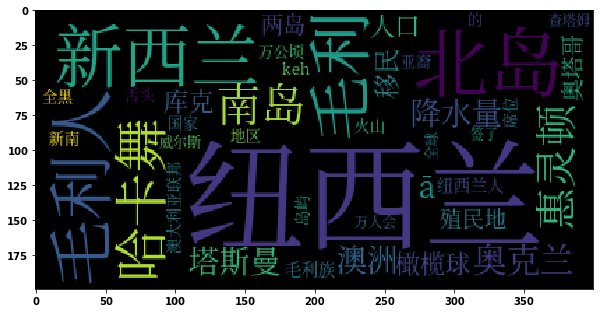

In [45]:
# Plot wordcloud pic
plt.figure(figsize=(10, 12))
plt.imshow(wc.generate_from_frequencies(city_article_keywords_dict))
plt.show()

### Plot WordCloud With Image Mask

In [46]:
from PIL import Image
import numpy as np

In [47]:
# Load mask file
city_mask = np.array(Image.open('./data/mask.png'))

In [48]:
wordcloud_with_mask = wordcloud.WordCloud(
    font_path='./data/SourceHanSerifSC-Regular.otf', 
    mask=city_mask
    )

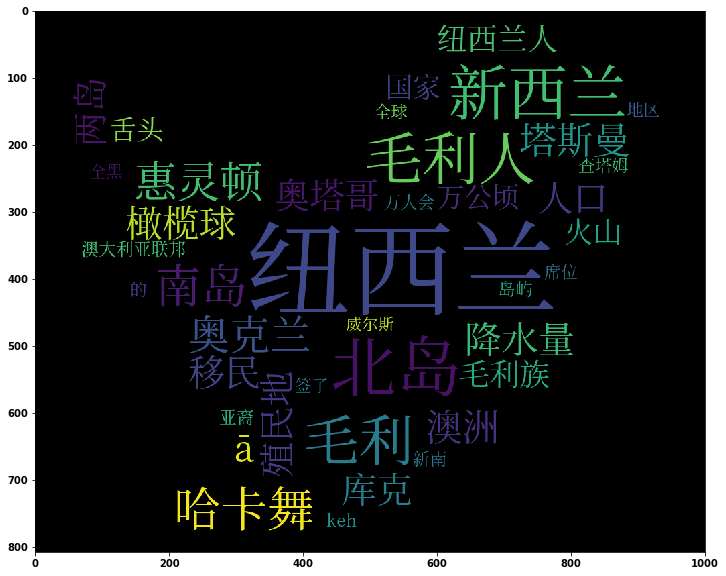

In [49]:
# Plot wordcloud with mask pic
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud_with_mask.generate_from_frequencies(city_article_keywords_dict))
plt.show()

## TF_IDF Vectorized

### Cosine Similarity

![](https://github.com/pchen12567/picture_store/blob/master/AI_For_NLP/cosine_similarity.jpg?raw=true)

### TF_IDF Vectorizer with sklearn

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
# Init vectorizer
vectorized = TfidfVectorizer() # Could set argument @max_features, eg.10000

In [52]:
# Vectoring the corpus
X = vectorized.fit_transform(articles)

In [53]:
# View the type of X
type(X)

scipy.sparse.csr.csr_matrix

In [54]:
# View the shape of X
print('Number of total documents is: {}.\nNumber of total features is: {}.'.format(X.shape[0], X.shape[1]))

Number of total documents is: 1000.
Number of total features is: 132723.


In [159]:
# vectorized.vocabulary_

In [368]:
# Get the positions which values are not zero for first document
np.where(X.toarray()[0])[0][:100]

array([ 1332,  1527,  1919,  1980,  1995,  2000,  2004,  2068,  2100,
        2186,  2197,  2202,  2221,  2529,  9714, 10485, 10687, 11832,
       12466, 13193, 14300, 14322, 14387, 14408, 14454, 14472, 14502,
       14851, 14911, 14929, 14985, 15008, 15013, 15068, 15087, 15151,
       15156, 15157, 15197, 15234, 15247, 15248, 15259, 15310, 15363,
       15368, 15434, 15577, 15728, 15827, 15900, 16303, 16363, 16645,
       16800, 16881, 17153, 17158, 17197, 17204, 17252, 17264, 17287,
       17500, 17517, 17621, 17675, 17733, 17846, 17907, 17971, 17992,
       17993, 18008, 18134, 18181, 18279, 18706, 18801, 18965, 18983,
       19002, 19081, 19109, 19110, 19157, 19504, 19841, 19904, 19911,
       19915, 20108, 20204, 20410, 20513, 20886, 20917, 21055, 21118,
       21256])

In [56]:
# View vector value of the 1332th feature in first article
X.toarray()[0][1332]

0.014849608973509388

### Search the similar document

#### Function to Calculate Cosine Distance

In [76]:
from scipy.spatial.distance import cosine

In [77]:
def distance(v1, v2):
    return cosine(v1, v2)

In [78]:
# Test
distance([1,1], [2,2])

0.0

#### Init two random documents in corpus

In [57]:
import random

In [193]:
# Generate two random documents ids
document_id_1, document_id_2 = random.randint(0,1000), random.randint(0,1000)
print(document_id_1)
print(document_id_2)

15
882


In [194]:
# View content of first one
articles[document_id_1][:1000]

'物理学 物理学 自然 是 研究 物质 能量 的 本质 与 性质 的 自然科学 由于 物质 与 能量 是 所有 科学研究 的 必须 涉及 的 基本要素 所以 物理学 是 自然科学 中 最 基础 的 学科 之一 物理学 是 一种 实验 科学 物理学 者 从 观测 与 分析 大自然 的 各种 基于 物质 与 能量 的 现象 来 找出 其中 的 模式 这些 模式 称为 物理 理论 经得起 实验 检验 的 常用 物理 理论 称为 物理 定律 直到 有 一天 被 证明 是 有 错误 为止 具 可否 证性 物理学 是 由 这些 定律 精致 地 建构 而成 物理学 是 自然科学 中 最 基础 的 学科 之一 化学 生物学 考古学 等等 科学 学术 领域 的 理论 都 是 建构 于 这些 物理 定律 物理学 是 最 古老 的 学术 之一 物理学 化学 生物学 等等 原本 都 归属于 自然哲学 的 范畴 直到 十七世纪 至 十九世纪 期间 才 渐渐 地 从 自然哲学 中 分别 成长 为 独立 的 学术 领域 物理学 与 其它 很多 跨 领域 研究 有 相当 的 交集 如 量子化学 生物 物理学 等等 物理学 的 疆界 并 不是 固定 不变 的 物理学 里 的 创始 突破 时常 可以 用来 解释 这些 跨 领域 研究 的 基础 机制 有时 还会 开启 崭新 的 跨 领域 研究 通过 创建 新 理论 与 发展 新 科技 物理学 对于 人类文明 有 极为 显着 的 贡献 例如 由于 电磁学 的 快速 发展 电灯 电动机 家用电器 等 新 产品 纷纷 涌现 人类 社会 的 生活 水平 也 得到 大幅 提升 由于 核子 物理学 日趋 成熟 核能 发电 已 不再 是 蓝图 构想 但 其 所 引致 的 安全 问题 也 使 人们 意识 到 地球 环境 生态 与 人类 的 脆弱 渺小 物理 一词 在 英文 里 是 physics 最先 出自于 古希腊 文 原意 是 自然 在 中文 里 这词 最早 可 在 战国时期 佚书 鹖 冠子 王鈇 篇 找到 愿闻 其 人情 物理 所以 啬 万物 与 天地 总 与 神明 体正 之 道 在 这里 物理 指 的 是 一切 事物 之 道理 三国 时期 杨泉 着 有物 理论 是 最早 的 书名 含有 物理 一词 的 着 作 明末清初 科学家 方以智 受到 西学 影响 撰写 

In [195]:
# View content of second one
articles[document_id_2][:1000]

'邓小平 邓小平 中国 近代 重要 政治 人物 原名 邓 先圣 后 由 启蒙 老师 在 法国 留学 时 改名 邓希 贤后 在 1927 年 正式 改名 为 邓小平 以 适应 地下 工作 曾 在 1930 年代 化名 为 邓斌 中国 四川省 广安 州 协兴乡 今 广安市 广安区 协兴镇 牌坊 村 人 祖籍 江西 吉水 在 法国 勤工 俭读 期间 经 周恩来 丶 赵世炎 等 人 介绍 和 影响 下 加入 了 旅法 共产主义 小组 而 他 和 后来 成为 总理 的 周恩来 更加 成为 终身 好友 及 拍档 并 互相 扶持 比如 在 文化大革命 中 暗中 派 人 保护 被 下放 的 他 亦 向 毛泽东 推荐 他 为 第一副 总理 使 他 铺路 得以 在 晚年 时 成为 最高 领导人 后 留学 苏联 并 于 莫斯科中山大学 毕业 经过 多年 的 努力 最终 成为 中国共产党 中国人民解放军 和 中华人民共和国 实际 最高 领导人 1977 年 中共 十届 三中全会 后 复任 中国共产党中央委员会 副 主席 中共 中央政治局常委 和 国务院 副 总理 等 职 1978 年 在 中共十一届三中全会 上 确认 领导 地位 1978 年 至 1983 年任 全国政协 主席 1981 年 至 1989 年任 中国共产党 中央军事委员会 主席 1982 年 至 1987 年任 中国共产党 中央顾问委员会 主任 1983 年 至 1990 年任 中华人民共和国中央军事委员会 主席 他 亦 是 中共八大 元老 之 首 邓小平 一生 未 担任 中国 国家元首 中国政府 首脑 或 中共 最高 领导职务 但 从 1978 年 12 月 中共十一届三中全会 至 1989 年 11 月 辞去 中共中央 军委主席 中共 十三届 五中全会 一职 前 普遍认为 他 是 实际 的 最高 领导人 并 写入 中国共产党 章程 予以 确认 直到 今天 他 定下 的 政治 及 经济 路线 对 中华人民共和国 政治 仍 保持 巨大 的 影响力 官方 评价 为 伟大 的 马克思主义者 伟大 的 无产阶级 政治家 军事家 外交家 中国共产党 第二代 中央 领导集体 的 核心 中国共产党 称 他 为 改革开放 的 总 设计师 称以 其 部分 政治理念 为 核心 的 政治 理论 为 邓小平理论 作为 党和国家 的 指导思想 和

#### Init random target document

In [292]:
# Generate target document id
target_doc = random.randint(0,1000)
print(target_doc)

810


In [293]:
# View content of target
articles[target_doc][:1000]

'理查德 瓦格纳 威廉 理查德 瓦格纳 德国 作曲家 剧作家 以 其 歌剧 闻名 理查德 瓦格纳 不同于 其他 的 歌剧 作者 他 不但 作曲 还 自己 编写 歌剧 剧本 他 是 德国 歌剧 史上 一位 举足轻重 的 人物 前面 承接 莫扎特 的 歌剧 传统 后面 开启 了 后 浪漫主义 歌剧 作曲 潮流 理查德 施特劳斯 紧随其后 同时 因为 他 在 政治 宗教 方面 思想 的 复杂性 成为 欧洲 音乐史 上 最具 争议 的 人物 理查德 瓦格纳 一 开始 是 延续 卡尔马 利亚 冯 韦伯 和 贾 科莫 梅耶 贝尔 的 浪漫主义 传统 但 后来 提出 了 整体 艺术 的 概念 整合 了 诗歌 视觉艺术 歌剧 及 剧场 并 在 1849 至 1852 年间 提出 了 许多 的 理论 瓦格纳 后来 将 这些 概念 放入 由 四部 歌剧 组成 的 系列 歌剧 尼伯龙 根 的 指环 中共 花 了 26 年 的 时间 才 完成 理查德 瓦格纳 后期 的 作品 以 其 复杂 的 音乐 织度 丰富 的 和 声及 配器法 着 称 另外 他 也 在 作品 中 灵活 的 使用 主导 动机 也 就是 会 和 特定人物 地点 或是 事物 一起 出现 的 一到 两个 小节 音乐 理查德 瓦格纳 在 音乐 语言 上 的 一些 进展 例如 极度 的 以及 快速 变换 的 调性 也 影响 古典音乐 的 发展 瓦格纳 的 崔斯坦 与 伊索 德 可以 算是 现代 音乐 的 开始 理查德 瓦格纳 曾 建造 自己 的 歌剧院 也 就是 拜 罗伊特 节日 剧院 其中 有 许多 新颖 的 设计 此 歌剧院 是 为了 歌剧 尼伯龙 根 的 指环 而 兴建 帕西法尔 也 是 在 这里 首演 后来 的 拜 罗伊特 音乐节 也 在 此 固定 演出 瓦格纳 的 十部 乐剧 在 瓦格纳 建造 歌剧院 时 他 对于 音乐 及 戏剧 的 想法 又 改变 了 他 也 将 一些 传统 形式 引入 他 最后 几部 作品 中 包括 尼伯龙 根 的 指环 在 理查德 瓦格纳 的 最后 几年 生命 中 充斥 着 政治 流亡者 动盪 的 爱情 以及 贫穷 他 在 音乐 戏剧 及 政治 上 的 争议 作品 在 最近 数十年 来 得到 许多 的 注意 尤其 是 其中 的 反犹太 词句 他 的 概念 在 许多 二十世纪 的 艺术 中 可以 看

#### Compare Cosine Distance

In [294]:
distance(X.toarray()[target_doc], X.toarray()[document_id_1])

0.9733979466602197

In [295]:
distance(X.toarray()[target_doc], X.toarray()[document_id_2])

0.9809559280175858

#### Search the similar documents with target one in corpus

In [296]:
# Get all distance with target document
X_array = X.toarray()
distance_list = [distance(X_array[target_doc], X_array[i]) for i in range(1000)]

In [297]:
# Rank the distance and get the top ten index
rank_distance_index = np.argsort(distance_list)
print(rank_distance_index[:10])

[810 643 809 652 650 651 966 887 869 888]


**View result**

In [300]:
articles[643][:1000]

'歌剧 歌剧 为 复数形 是 一门 西方 舞台 表演艺术 简单 而言 就是 主要 或 完全 以 歌唱 和 音乐 来 交代 和 表达 剧情 的 戏剧 是 唱出来 而 不是 说 出来 的 戏剧 歌剧 在 17 世纪 即 1600 年 前后 才 出现 在 意大利 的 佛罗伦萨 它 源自 古希腊 戏剧 的 剧场 音乐 歌剧 的 演出 和 戏剧 的 所 需 一样 都 要 凭借 剧场 的 典型 元素 如 背景 戏服 以及 表演 等 一般而言 较之 其他 戏剧 不同 的 是 歌剧 演出 更 看重 歌唱 和 歌手 的 传统 声乐 技巧 等 音乐 元素 歌手 和 合唱团 常有 一队 乐器 手 负责 伴奏 有 的 歌剧 只 需 一队 小 乐队 有 的 则 需要 一团 完整 的 管弦乐团 有些 歌剧 中 都 会 穿插 有 舞蹈 表演 如 不少 法语 歌剧 都 有 一场 芭蕾舞 表演 歌剧 被 视为 西方 古典音乐 传统 的 一部分 因此 和 经典音乐 一样 流行 程度 不及 当代 流行音乐 而 近代 的 音乐剧 被 视为 歌剧 的 现代 版本 歌剧 最早 出现 在 17 世纪 的 意大利 既 而 传播 到 欧洲各国 而 德国 的 海因里希 许茨 法国 的 让 巴普蒂斯 特吕利 和 英格兰 的 亨利 珀 赛尔 分别 在 他们 自己 的 国家 开创 了 17 世纪 歌剧 的 先河 一直 到 18 世纪 意大利 歌剧 依然 是 欧洲 的 主流 纵然 巴黎 吸引 了 不少 外国 作曲家 到 法国 谋生 而 韩德尔 最终 落脚 英伦 而 意大利 歌剧 的 主流 一直 是 正 歌剧 直至 格鲁克 在 1760 年代 推出 的 革新 歌剧 以 对抗 正 歌剧 的 矫揉造作 而 今天 依然 着 名 的 18 世纪 歌剧 巨匠 显然 是 莫札特 莫札特 少年 时先 以 正 歌剧 起家 既 而 以 意大利语 喜歌剧 风行 各地 尤 以 费加罗 的 婚礼 唐乔望 尼 和 女人 皆 如此 为 人 称颂 而莫氏 倒数 第二部 歌剧 魔笛 最后 一部 为 狄多王 的 仁慈 更是 德语 歌剧 的 指标性 作品 19 世纪 初期 是 美声 belcanto 风格 歌剧 的 高峰期 风行 当时 的 罗西尼 多 尼采蒂 和 贝利尼 等 人 的 歌剧 时至今日 依然 常见于 舞台 与此同时 贾 科莫 梅耶 贝尔 的 歌剧 作

In [301]:
articles[809][:1000]

'尼伯龙 根 的 指环 尼伯龙 根 的 指环 本意 为 尼伯龙 人 的 指环 是 一个 由 四部 歌剧 组成 的 系列 由 华格纳 作曲 及 编剧 整个 于 1848 年 开始 创作 至 1874 年 完成 历时 共 26 年 创作 灵感 来自 北欧 神话 威尔森 格 英雄传 及 日尔曼 叙事 长诗 尼 贝龙根 之歌 内 的 故事 及 人物 特别 是 冰岛 家族 传说 Icelanderssagas 冰岛 历史 英雄 故事 散文 尼伯龙 根 的 指环 由 四部 歌剧 组成 亦 被 瓦格纳 称为 舞台 节 庆典 三日 剧及 前夕 包括 中世纪 时 基督教 盛行于 欧洲 过去 流传 的 北欧 神话 被 视作 邪教 清理 现在 残存 的 较为 着 名 的 有 英格兰 的 贝 奥武甫 冰岛 的 埃达 和 德国 的 尼伯龙 根之歌 等 华格纳 的 指环 改编自 中世纪 德国 的 民间 叙事诗 尼伯龙 根之歌 北欧 神话 与 其他 的 古代 神话 之间 有着 显着 的 差异 北欧 神话 中神 不是 全能 的 所向无敌 的 而 有 一定 的 限制 本身 也 要 面临 灭亡 的 命运 诸神 的 黄昏 中 就 体现 了 这 一 万物 同归于尽 转换 新生 的 思想 华格纳 整理 这部 叙事诗 后 打算 写成 歌剧 脚本 却 招来 很多 反对 多数 人 认为 这样 庞大 的 脚本 无法 配成 音乐 但 华格纳 成功 了 他 以 二百多个 主导 动机 贯穿 全剧 採用 明暗 两条线 来 推进 剧情 的 发展 起初 华格纳 只是 选取 了 故事 的 一部分 作 了 齐格菲 之死 SiegfriedsTod 也 就是 后来 诸神 的 黄昏 的 前身 这部 作品 是 以布仑 希尔德 引 齐格弗 里德 进入 瓦尔 哈拉 天宫 作为 结局 的 不久 华格纳 觉得 不 满意 认为 缺乏 更深一层 的 伦理 意义 并且 无法 在 剧院 里 演出 所以 他 增加 了 一部 青年 齐格菲 DerjungeSiegfried 成为 齐格菲 的 基础 并 将 结局 改 得 含有 深奥 的 玄学 意味 最后 为了 使 全剧 完整 又 补充 了 女 武神 及序剧 莱茵 的 黄金 从 音乐 上 来看 女 武神 与 齐格菲 最 精彩 而 莱茵 的 黄金 较为 优美 诸神 的 黄昏 则 显示 了 瓦格纳 多年 来 所 

In [302]:
articles[652][:1000]

'克里斯托夫 维利 巴尔德 格鲁克 克里斯托夫 维利 巴尔德 里特 冯 格鲁克 德国 作曲家 在 布拉格 学习 音乐 后 去 意大利 学习 歌剧 创作 毕业 后 去 英国 旅行 1750 年 结婚 后 定居 维也纳 四年 后任 宫廷 歌剧院 的 乐队 指挥 并 创作 了 大量 的 意大利 田园 剧 和 法国 喜歌剧 1762 年 他 在 奥菲欧 与 尤丽 狄茜 中 尝试 改革 创立 了 一种 新 的 意大利 歌剧 风格 其 一生 创作 了 一 百余部 歌剧 但 当中 很多 已经 遗失 作曲家 在 巴黎 写 的 最后 一部 法语 歌剧 首演 失败 后 回到 维也纳 在 那里 逝世 格鲁克 在 融合 了 抒情 悲剧 因素 的 奥菲欧 与 优丽 狄茜 中 对 歌剧 进行 了 改革 他 针对 当时 所 流行 的 正 歌剧 形式 中 的 弊端 提出 了 改革 的 要求 他 主张 音乐 应该 克尽 其以 表情 服务 诗歌 之职 也 就是 音乐 为 戏剧 服务 简化 音乐 及 情节 摒弃 传统 的 炫技 要求 提倡 自然 纯朴 的 表现 他 强调 歌剧 要 有 深刻 的 内容 追求 戏剧 的 真实性 并 把 原由 古 钢琴伴奏 的 宣叙调 改为 用 管弦乐 伴奏 以此 缩短 了 宣叙调 与 咏叹调 之间 的 差距 可是 他 的 这些 改革 并 没有 被 人们 所 认可 歌剧 上演 后 人们 较 多 关注 的 却是 脚本 作家 Calzabigi 人们 拿 他 和 古希腊 悲剧 家 索福克 勒斯 和 英国人 莎士比亚 比较 但 无庸置疑 的 是 正是 格鲁克 的 改革 奠基 了 现代 歌剧 的 基础 他 的 这种 风格 并 没有 直接 被 后来 的 作曲家 沿用 但 影响 了 无数 人伯 辽兹 曾 写文章 论述 他 的 改革 歌剧 瓦格纳 则 上演 过 他 的 伊菲 姬尼 在 奥 里德 的 修订本 由于 不 被 接受 所以 格鲁克 创作 了 三部 改革 歌剧 后 又 回到 了 传统 的 老 路上 三部 中 的 另外 两部 是'

## Boolean Search

In [293]:
bin(49)

'0b110001'

In [294]:
bin(38)

'0b100110'

In [295]:
49 & 38

32

In [296]:
bin(32)

'0b100000'

### Build Search Engine

Input: Words, Corpus<br>
Output: Documents

#### Naive Search Engine

In [303]:
def naive_search(query, corpus):
    keywords = query.split()
    document_ids = [i for i, doc in enumerate(corpus) if all(word in doc for word in keywords)]
    return set(document_ids)
    # O(Corpus * Keywords)

In [304]:
len(articles)

1000

#### Search Engine with TF_IDF

**Input words --> The documents which contain these words**

In [305]:
# View X shape
X.shape

(1000, 132723)

In [306]:
# Transposition X
transposed_x = X.transpose().toarray()

In [307]:
# View Shape
transposed_x.shape

(132723, 1000)

**Get Id from Word**

In [315]:
word_2_id = vectorized.vocabulary_

In [316]:
word_2_id['数学']

74666

**Get Word from ID**

In [317]:
id_2_word = {i: w for w, i in word_2_id.items()}

In [318]:
id_2_word[74666]

'数学'

**Get documents ids which contain target word**

In [319]:
np.where(transposed_x[74666])

(array([  0,   1,   4,   8,   9,  10,  12,  14,  15,  16,  17,  19,  21,
         23,  33,  35,  39,  49,  50,  59,  62,  63,  64,  66,  74,  75,
         80,  85,  86,  87,  89,  98, 123, 144, 146, 147, 156, 157, 160,
        164, 172, 176, 183, 197, 244, 248, 255, 256, 260, 341, 350, 391,
        412, 433, 445, 454, 465, 468, 469, 474, 476, 478, 482, 484, 488,
        503, 514, 517, 519, 574, 596, 611, 636, 637, 657, 667, 698, 699,
        702, 712, 756, 806, 830, 853, 862, 863, 885, 906, 913, 922, 955,
        956, 972, 988, 993, 994, 995]),)

**Get Intersection of several sets**

In [320]:
from functools import reduce

In [321]:
d1, d2, d3 = {1, 2, 3}, {4, 5, 6, 3, 2}, {1, 3, 4}

In [322]:
from operator import and_

In [323]:
reduce(and_, [d1, d2, d3])

{3}

**Build Search Engine**

In [324]:
def search_engine(query):
    '''
    @query is the searched words, splited by space
    @return is the related documents which ranked by tfidf similarity
    '''
    # Get target words from query
    words = query.split()
    
    # Get target IDs from word_2_id
    candidates_ids = [word_2_id[w] for w in words]
    
    # Get documents ids of each target IDs
    documents_ids = [
        set(np.where(transposed_x[_id])[0]) for _id in candidates_ids
    ]
    
    # Get Intersection of documents ids
    # Could know the documents which contain these words
    merged_documents_ids = reduce(and_, documents_ids) 
    
    return  merged_documents_ids

**Compare Running Time with Naive Search Engine**

In [325]:
%%time
print(search_engine('美国 历史 数学家'))

{547, 132, 519, 596, 474, 157, 350}
CPU times: user 4.4 ms, sys: 8.15 ms, total: 12.6 ms
Wall time: 10.7 ms


In [326]:
%%time
print(naive_search('美国 历史 数学家', articles))

{547, 132, 519, 830, 596, 474, 157, 350}
CPU times: user 12.8 ms, sys: 19.5 ms, total: 32.3 ms
Wall time: 32 ms


**Optimize Search Engine**

Sorted the search result with cosine distance

In [327]:
def search_engine(query):
    '''
    @query is the searched words, splited by space
    @return is the related documents which ranked by tfidf similarity
    '''
    # Get target words from query
    words = query.split()
    
    # Get query vector by vectorized
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0]
    
    # Get target IDs from word_2_id
    candidates_ids = [word_2_id[w] for w in words]
    
    # Get documents ids of each target IDs
    documents_ids = [
        set(np.where(transposed_x[_id])[0]) for _id in candidates_ids
    ]
    
    # Get Intersection of documents ids
    # Could know the documents which contain these words
    merged_documents_ids = reduce(and_, documents_ids)
    
    # Sorted result with cosine distance
    X_array = X.toarray()
    sorted_documents_ids = sorted(merged_documents_ids, key=lambda _id: distance(query_vec, X_array[_id]))
    
    return sorted_documents_ids

**Test**

In [328]:
%%time
print(search_engine('美国 历史 数学家'))

[474, 350, 157, 596, 519, 132, 547]
CPU times: user 206 ms, sys: 302 ms, total: 508 ms
Wall time: 542 ms


In [329]:
articles[474][:1000]

'约翰 内斯 开普勒 约翰 内斯 开普勒 ˈ k ʰ ɛ pl ɐ 德国 天文学家 数学家 开普勒 是 十七世纪 科学 革命 的 关键人物 他 最为 人知 的 成就 为 开普勒 定律 这是 稍后 天文学家 根据 他 的 着 作新 天文学 世界 的 和谐 哥白尼 天文学 概要 萃取 而成 的 三条 定律 这些 杰作 对 艾萨克 牛顿 影响 极大 启发 牛顿 后来 想 出 牛顿 万有引力 定律 在 他 的 职业生涯 中 开普勒 曾 在 奥地利 格拉茨 的 一家 神学院 担任 数学教师 成为 汉斯 乌尔里 奇艾根 伯格 亲王 HansUlrichvonEggenberg 的 同事 后来 他成 了 天文学家 第谷 布拉赫 的 助手 并 最终 成为 皇帝 鲁道夫 二世 及其 两任 继任者 马蒂亚 斯 和 费迪南 二世 的 皇家 数学家 他 还 曾经 在 奥地利 林茨 担任 过 数学教师 及 华伦斯 坦 将军 的 顾问 此外 他 在 光学 领域 做 了 基础性 的 工作 发明 了 一种 改进型 的 折光 式 望远镜 开普勒 望远镜 并 提及 了 同 时期 的 伽利略 利用 望远镜 得到 的 发现 开普勒 生活 的 年代 天文学 与 占星学 没有 清楚 的 区分 但是 天文学 文科 中 数学 的 分支 与 物理学 自然哲学 的 分支 却 有着 明显 的 区分 因为 宗教信仰 克卜勒 将 宗教 论点 和 理由 写进 他 的 作品 因为 相信 上帝 用 智慧 创造 世界 人 只要 透过 自然 理性 之光 也 可 理解 上帝 创造 的 计画 开普勒 将 他 的 新 天文学 描述 为 天体 物理学 到 亚里士多德 的 形而上学 的 旅行 亚里士多德 宇宙论 的 补充 通过 将 天文学 作为 通用 数学 物理学 的 一部分 改变 古代 传统 的 物理 宇宙学 约翰 内斯 开普勒 于 1571 年 12 月 27 日 也 就是 当年 的 圣若望 庆日 在 帝国 自由 城 魏尔德 尔 斯塔特 今 德国 巴登 符腾堡 州 的 一部分 位于 斯图加特 市中心 以西 30km 出生 在 他 前面 有 两个 哥哥 和 一个 姐姐 他 的 祖父 西 博尔德 开普勒 SebaldK 曾经 是 这个 城镇 的 市长 但是 约翰 内斯 开普勒 出生 时 开普勒 家族 的 家业 已经 开始 衰落 他 的 父亲 

In [330]:
articles[547][:1000]

'世界语 世界语 又称 希望 语 因为 Esperanto 在 该 语言 中 的 意思 为 希望 者 旧译 万国 新语 爱斯 不难 读是 最为 广泛 使用 的 人工 语言 波兰 犹太人 眼科医生 柴门 霍夫 在 对 其 进行 了 十年 的 创作 工作 后于 1887 年 出版 第一 本书 创立 了 这个 语言 的 基础 世界语 的 命名 来自 于 希望 博士 这是 柴门 霍夫 出版 第一 本书 时所 使用 的 笔名 最早 柴门 霍夫 给 这门 语言 取 的 名字 LaLingvoInternacia 意为 国际 语言 在 第一 本书 中 柴门 霍夫 写道 自己 对 世界语 有 三个 主要 目标 总之 世界语 的 定位 是 国际 辅助 语言 不是 用来 代替 世界 上 已经 存在 的 语言 柴门 霍夫 原本 想要 创立 一种 简单 易学 而 灵活 的 语言 一种 普世 的 第二语言 用来 促进 世界 和平 并且 帮助 世界各地 的 人民 了解 他国 的 文化 而 现在 一些 世界语 者 仍然 抱 着 这样 的 期望 根据 民族语言 网 的 统计 世界各地 一共 有 大约 两百万 人 在 某种程度 上会 说 世界语 其中 包括 大约 2000 名以 世界语 为 母语 的 人 世界语 是 目前 唯一 有 母语 人士 的 人工 语言 国际 世界语 协会 在 全球 120 个 国家 中有 大约 5500 个 成员 其中 在 欧洲 东亚 及 北美 的 成员 最 多 世界语 维基百科 至今已有 大约 个 条目 是 第 32 大 维基百科 曾 在 2005 年 排名第 32 也 是 最大 的 人造 语言 维基百科 至于 网上 学习 世界语 的 平台 lernu 是 最 受欢迎 的 平台 之一 在 2013 年 公布 有 15 万个 注册 用户 每个 月 也 有 大约 15 至 20 万个 访客 2015 年 5 月 28 日多 邻国 增添 了 通过 英语 学习 世界语 的 课程 隔年 10 月 26 日 通过 西班牙语 学习 世界语 的 课程 也 加入 了 多 邻国 外语 课程 的 行列 2017 年 5 月 27 日止 在 多 邻国 网站 上 开始 学习 世界语 的 人 超过 一百万 世界语 有 文学作品 歌曲 和 电影 可说 在 短短的 一个多 世纪 内 衍生 了 一种 独特 

#### Display Search Result with Pretty Print

**First Try**

In [361]:
# result_ids = search_engine('美国 历史 数学家')

# for i, _id in enumerate(result_ids):
#     print('## Search Result {}'.format(i+1))
#     print(df['text'][_id])
#     print('#'*50)

In [332]:
import re

In [333]:
text = """美国有线电视新闻网援引美国军方官员的话说"""

In [334]:
pat = r'(新闻|官员)'

In [335]:
re.compile(pat).sub(repl="**\g<1>**", string=text)

'美国有线电视**新闻**网援引美国军方**官员**的话说'

**Get Query Pattern**

In [336]:
def get_query_pat(query):
    return re.compile('({})'.format('|'.join(query.split())))

In [337]:
get_query_pat('美国 历史 数学家')

re.compile(r'(美国|历史|数学家)', re.UNICODE)

**Highlight Keywords**

In [338]:
def highlight_keywords(pat, document):
    return pat.sub(repl="**\g<1>**", string=document)

In [339]:
temp = '''在他的职业生涯中，开普勒曾在奥地利格拉茨的一家神学院担任数学教师，成为汉斯·乌尔里奇·艾根伯格亲王（Hans Ulrich von Eggenberg）的同事。后来，他成了天文学家第谷·布拉赫的助手，并最终成为皇帝鲁道夫二世及其两任继任者马蒂亚斯和费迪南二世的皇家数学家。他还曾经在奥地利林茨担任过数学教师及华伦斯坦将军的顾问。此外，他在光学领域做了基础性的工作，发明了一种改进型的折光式望远镜（开普勒望远镜），并提及了同时期的伽利略利用望远镜得到的发现。
'''

In [340]:
print(temp)

在他的职业生涯中，开普勒曾在奥地利格拉茨的一家神学院担任数学教师，成为汉斯·乌尔里奇·艾根伯格亲王（Hans Ulrich von Eggenberg）的同事。后来，他成了天文学家第谷·布拉赫的助手，并最终成为皇帝鲁道夫二世及其两任继任者马蒂亚斯和费迪南二世的皇家数学家。他还曾经在奥地利林茨担任过数学教师及华伦斯坦将军的顾问。此外，他在光学领域做了基础性的工作，发明了一种改进型的折光式望远镜（开普勒望远镜），并提及了同时期的伽利略利用望远镜得到的发现。



In [341]:
highlight_keywords(get_query_pat('美国 历史 数学家'), temp)

'在他的职业生涯中，开普勒曾在奥地利格拉茨的一家神学院担任数学教师，成为汉斯·乌尔里奇·艾根伯格亲王（Hans Ulrich von Eggenberg）的同事。后来，他成了天文学家第谷·布拉赫的助手，并最终成为皇帝鲁道夫二世及其两任继任者马蒂亚斯和费迪南二世的皇家**数学家**。他还曾经在奥地利林茨担任过数学教师及华伦斯坦将军的顾问。此外，他在光学领域做了基础性的工作，发明了一种改进型的折光式望远镜（开普勒望远镜），并提及了同时期的伽利略利用望远镜得到的发现。\n'

**Build Function to Pretty Print**

In [342]:
def search_engine_with_pretty_print(query):
    result_ids = search_engine(query)

    for i, _id in enumerate(result_ids):
        print('## Search Result {}'.format(i+1))
        
        content = df['text'][_id]
        content = highlight_keywords(get_query_pat(query), content)
        print(content)
        print('#'*50)

In [362]:
# search_engine_with_pretty_print('美国 历史 数学家')

**Pretty Print with IPython.display**

In [344]:
from IPython.display import display, Markdown

In [345]:
def search_engine_with_pretty_print(query):
    result_ids = search_engine(query)

    for i, _id in enumerate(result_ids):
        title = '## Search Result {}'.format(i+1)
        content = df['text'][_id]
        content = highlight_keywords(get_query_pat(query), content)
        
        display(Markdown(title + '\n' + content))
        display(Markdown('----'))

In [371]:
# def search_engine_with_pretty_print(query):
#     result_ids = search_engine(query)

#     for i, _id in enumerate(result_ids):
#         if i < 1: # To save space
#             title = '## Search Result {}'.format(i+1)
#             content = df['text'][_id]
#             content = highlight_keywords(get_query_pat(query), content)

#             display(Markdown(title + '\n' + content))
#             display(Markdown('----'))

In [372]:
# To save space, just display one result
search_engine_with_pretty_print('美国 历史 数学家')

## Search Result 1
约翰内斯·开普勒

约翰内斯·开普勒（ [ˈkʰɛplɐ]，），德国天文学家、**数学家**。开普勒是十七世纪科学革命的关键人物。他最为人知的成就为开普勒定律，这是稍后天文学家根据他的着作《新天文学》、《世界的和谐》、《哥白尼天文学概要》萃取而成的三条定律。这些杰作对艾萨克·牛顿影响极大，启发牛顿后来想出牛顿万有引力定律。

在他的职业生涯中，开普勒曾在奥地利格拉茨的一家神学院担任数学教师，成为汉斯·乌尔里奇·艾根伯格亲王（Hans Ulrich von Eggenberg）的同事。后来，他成了天文学家第谷·布拉赫的助手，并最终成为皇帝鲁道夫二世及其两任继任者马蒂亚斯和费迪南二世的皇家**数学家**。他还曾经在奥地利林茨担任过数学教师及华伦斯坦将军的顾问。此外，他在光学领域做了基础性的工作，发明了一种改进型的折光式望远镜（开普勒望远镜），并提及了同时期的伽利略利用望远镜得到的发现。

开普勒生活的年代，天文学与占星学没有清楚的区分，但是天文学（文科中数学的分支）与物理学（自然哲学的分支）却有着明显的区分。因为宗教信仰，克卜勒将宗教论点和理由写进他的作品。因为相信上帝用智慧创造世界，人只要透过自然理性之光，也可理解上帝创造的计画。。开普勒将他的新天文学描述为“天体物理学”、“到亚里士多德的《形而上学》的旅行”、“亚里士多德宇宙论的补充”、通过将天文学作为通用数学物理学的一部分改变古代传统的物理宇宙学。

约翰内斯·开普勒于1571年12月27日，也就是当年的圣若望庆日，在帝国自由城魏尔德尔斯塔特（今德国巴登-符腾堡州的一部分，位于斯图加特市中心以西30km）出生，在他前面有两个哥哥和一个姐姐。他的祖父西博尔德·开普勒（Sebald K.）曾经是这个城镇的市长，但是约翰内斯·开普勒出生时，开普勒家族的家业已经开始衰落。他的父亲海因里希·开普勒（Heinrich K.）为了营生，当了一名危险的雇佣兵，在约翰内斯五岁的时候就离开了家庭，据说后来死于荷兰的“八十年战争”。约翰内斯的母亲凯瑟琳那·古尔登曼（K. Guldenmann）是一名旅店老板的女儿，同时是一名医生和草药商。约翰内斯是早产儿，孩提时体弱多病。然而，他超常的数学才能经常给他外祖父旅馆内的客人留下深刻的印象。

他在很早的年纪就接触到并喜欢上了天文学，而这种喜欢贯穿了他的一生。在他6岁时，他看到了1577年的大彗星，并写道他“被妈妈带到一处高地看彗星。”在他9岁时，他观察到了另外一次天文事件——1580年的月食，并记录道他记得他被“叫到门外”看月食，月亮“看起来非常红”。然而，童年患上天花，使他的视力衰弱，双手残废，因此限制了他天文观察的能力。

1589年，在经历过文法学校、拉丁学校以及毛尔布劳恩（Maulbronn）的神学院之后，开普勒进入了图宾根大学的图宾根神学院。在那里，他师从维塔斯·穆勒（Vitus Müller）学习哲学及雅各布·黑尔布兰德（J. Heerbrand，菲利普·梅兰希< Philipp Melanchthon>在威登堡的学生）学习神学。雅各布·黑尔布兰德同时还教了另外一名当时还是学生的迈克尔·马斯特林（M. Maestlin）直至他在1590年成为图宾根校长。他证实了自己是一名杰出的**数学家**，并作为一名熟练的占星家给同窗占星，为自己赢得了声誉。在1583-1631年间担任图宾根大学数学教授的迈克尔·马斯特林的教导下，他学习了关于行星运动的托勒密体系与哥白尼学说。在那段时间，他自己成了哥白尼的拥护者。在一次学生辩论中，他从理论和神学两个角度捍卫太阳中心说，坚称太阳是宇宙动力的主要来源。虽然他很想成为一名牧师，在他学业将要结束之际，开普勒被推荐担任格拉茨新教学校（后来成为格拉茨大学）的数学与天文学教师。他于1594年4月接受了该职位，时年23岁。

开普勒的第一部主要天文学作品——《宇宙的神秘》是第一部捍卫哥白尼学说、公开发表的作品。开普勒声称在格拉茨教学的1595年7月19日顿悟，在黄道十二宫图中展示了土星和木星的定期相遇：他意识到规则的多边体按照规定的比率与一个内切圆和外切圆相连，他推测这可能是宇宙的几何基础。在寻找符合已知的天文学发现（甚至使用加入该系统的额外星球）、独特排列的多面体的努力失败后，开普勒开始用立体的多面体进行实验。他发现五个柏拉图多面体中的每一个都可通过球体进行独特的内切和外切；先构建这些多面体，每一个多面体装在一个球体里，这个球体又装在另一个多面体内，每个多面体可产生6层，分别对应6个已知的星球——水星、金星、地球、火星、木星和土星。对这些多面体进行正确的排序——八面体、二十面体、十二面体、四面体和六面体，开普勒发现假设这些星球环绕着太阳，那么球体可以按照一定的间距进行排列，间距对应于每个星球路径的相对尺寸（在已知的天文学观测结果的精确度范围内）。开普勒还发现了一个公式，将每个星球的轨道大小与其轨道周期进行关联：从里星球到外星球，轨道周期的增长率是轨道半径差的两倍。然而，开普勒后来又否定了这个公式，因为这个公式不够精确。

正如他在标题中所表明的，开普勒认为他已经揭示了上帝对宇宙的几何规划。开普勒对于哥白尼学说的许多热情源于他对于物质与精神之间的联系的神学信仰；宇宙本身是上帝的一个影像，太阳对应圣父，星球对应圣子，它们之间的间隔对应圣灵。《宇宙的神秘》的最初手稿包含了一延伸章节，用以调和太阳中心说与貌似支持地球中心说的圣经选段。

在其老师迈克尔·马斯特林的支持下，开普勒获准在图宾根大学理事会发表他的手稿，期间他删掉了《圣经》注释，增加了对哥白尼学说及他的新想法更简单易懂的描述。《宇宙的神秘》于1596年年底发表，开普勒于1597年年初收到了发表的版本，并将其发送给着名的天文学家与赞助人。该书并未被广泛阅读，但是它建立了开普勒作为一名高水平的天文学家的声誉。对赞助人及格拉茨管理他职位的人充满热情的付出，也是他进入赞助体系的关键之路。

开普勒从未放弃柏拉图式的多面体-球体宇宙学说——《宇宙的神秘》，虽然根据他后来的作品，其中的一些细节可能需要修改。他后来的主要作品，通过计算行星轨道的离心率，发现更精确的球体内外尺寸，但在某种意义上都是对该作品的进一步发展。1621年，开普勒发表了他扩展后的第二版《宇宙的神秘》，比第一版长一半，在脚注部分详细记录了在第一版发表之后的25年内他所作的修正与改进。

关于其影响，《宇宙的神秘》可以视为将尼古拉斯·哥白尼在他的作品《天体运行论》中提出的理论进行现代化的重要的第一步。当哥白尼试图在该书中发展日心学说的时候，他用托勒密工具（即周转圆与离心圆）解释星球轨道速度的变化，并继续用地球轨道中心作为参考点，而不是用太阳中心“辅助计算以便使读者不会因偏离托勒密太多而感到混淆。”现代天文学家很大部分归功于《宇宙的神秘》，尽管它的主要论点有瑕疵，“因为它代表了清除哥白尼学说中托勒密理论残留的第一步。”

1595年12月，开普勒被介绍给了芭芭拉·穆勒（B. Müller），一个带着幼小女儿——吉玛·德威纳维尔德（Gemma van Dvijneveldt）的23岁寡妇（结过两次婚），并开始向她求爱。穆勒不但是她前两任丈夫财产的女继承人，同时也是一名成功磨坊老板的女儿。尽管开普勒有着高贵的身份，但是她父亲约布斯特（Jobst）最初也反对他们的婚姻；虽然开普勒继承了他祖父的高贵身份，但是他的贫困使他与芭芭拉不般配。开普勒完成《宇宙的神秘》之后，约布斯特动了怜悯之心，但是这个婚约差点告吹，因为开普勒外出专注于出版的各项事宜。然而，帮忙建立该婚配的教会官员强迫穆勒遵守他们的协议。1597年4月27日，芭芭拉和开普勒结婚。

在他们婚姻的早年，他们生育了两个子女（海因里希与苏珊娜），但是都在襁褓里夭折了。1602年，他们又生了一个女儿（苏珊娜），1604年，生了一个儿子（弗里德里希），1607年又生了一个儿子（路德维格）。

《宇宙的神秘》出版之后，在格拉茨学校检察员的支持下，开普勒开始了他的雄心计划，进一步发展和完善他的作品。他计划编写另外4部书籍：一部关于宇宙的静止事物（太阳和固定的星球）；一部关于行星及其运动；一部关于行星的物理属性与地理特征的形成（侧重于地球）；一部是关于天空对地球的影响，涵盖大气光学、气象学和占星术。

他还收集许多他曾经赠送《宇宙的神秘》的天文学家们的意见，其中包括瑞玛奴斯·乌尔苏斯（尼古拉斯·赖默斯·柏尔）[Reimarus Ursus（N. Reimers Bär）]——鲁道夫二世的皇家**数学家**，同时也是第谷·布拉赫的激烈对手。乌尔苏斯没有直接回复他，但是重新发表了开普勒的奉迎信，以寻求他与第谷关于第谷体系争论（现在的叫法）中的优势。尽管有这个污点，第谷还是开始与开普勒通信，一开始就对开普勒系统进行严厉但合理的批判；在许多反对的理由中，第谷对其使用哥白尼不准确的数据提出了异议。通过书信往来，第谷和开普勒就广大范围内的天文学问题进行了讨论，并重点讨论了月球现象与哥白尼学说（特别是其神学活力）。但是没有第谷天文台更精确的数据，开普勒无法涉及其中的许多议题。

结果，开普勒将精力转向年代学与“和谐”，即音乐、数学及物质世界之间的命理关系，以及它们的占星结果。通过假设地球拥有精神（一种他后期用于解释太阳引起行星运动的属性），他建立了一个将占星内容和天文距离与天气与其它地球现象联系起来的推测系统。然而，到了1599年，他又发现他的工作受到数据不准确性的限制——正如不断增长的宗教紧张气氛正威胁他在格拉茨的工作一样。就在同年的12月份，第谷邀请开普勒在布拉格会面；1600年1月1日（甚至在他收到邀请函之前），开普勒就启程，希望第谷的资助能够帮解决他的哲学问题以及社会与经济问题。

1600年2月4日，开普勒在伊泽拉河畔贝纳特基（距离布拉格35km）见到了第谷·布拉赫及其助手弗朗茨·滕纳格尔（Franz Tengnagel）与朗高蒙田纳斯（Longomontanus）。伊泽拉河畔贝纳特基是第谷的新天文台所在地。开普勒以客人的身份在这里住了两个月，分析了第谷的一些火星发现；第谷严密地保护着他的数据，但是对开普勒的理论思想印象深刻，所以之后给了他更多接近的空间。开普勒计划借助火星数据测试他在《宇宙的神秘》中的理论，但是他预计这项工作将花费2年时间（因为第谷不允许他单纯的将资料拷贝作为己用）。在约翰内斯·杰森纽斯（Johannes Jessenius）的帮助下，开普勒尝试与第谷协商一个更为正式的雇佣安排，但是协商在激烈的争吵中破裂。于是开普勒在4月6日就前往布拉格。之后，开普勒和第谷很快就和解了，并最终就工资和生活安排达成了协议，6月，开普勒回到格拉茨去接他的家人。

格拉茨政治上和宗教上的麻烦打碎了他立刻回到第谷天文台工作的想法；为了继续他的天文学研究，开普勒以**数学家**的身份向斐迪南大公爵（Archduke F.）寻求了一份工作。为此，开普勒专门写了一篇文章给斐迪南。他在文中提出了一个月球运动力学理论：“地球上有一种力量，引起了月球的运动”。虽然这篇文章并未使他在费迪南宫廷获得职位，但是却详细介绍了一种测量月食的新方法，他将这种方法运用到了7月10日格拉茨的月食现象。这些观察成了他进行光学规律探索的基础，而《天文学的光学需知》则是他光学探索的顶峰。

1600年8月2日，在拒绝皈依天主教之后，开普勒和他的家人被驱逐出格拉茨。几个月后，开普勒及他的家人来到了布拉格。差不多1601年一整年，他得到了第谷的直接资助，第谷安排他分析行星观测结果与编写反对第谷（此时第谷已过世）对手——乌尔苏斯的小册子。9月，第谷帮开普勒获得了作为他先前向皇帝提议的新项目的合作者的委任：将取代伊拉斯谟·赖因霍尔德（Erasmus Reinhold）所作的《普鲁士星表》的《鲁道夫星表》。1601年10月24日第谷出人意料的逝世了，两天之后，开普勒被委任成为他的继任者，作为皇家**数学家**负责完成第谷未完成的工作。接下去作为皇家**数学家**的11年是开普勒一生中最为多产的时间。

作为皇家**数学家**，开普勒的主要职责是向皇帝提供占星术方面的建议。虽然开普勒对同时代占星家对未来或特定神学事件进行准确预言的努力采取怀疑态度，但是当他还是图宾根大学的一名学生时，他已经向他的朋友、家人和赞助人展示了极受欢迎的占星水平。除了给同盟国和外国领导人占星外，皇帝在遇到政治麻烦时，也向开普勒寻求建议。鲁道夫对许多其宫廷学者（包括炼金术士）的工作有着积极兴趣，并跟踪开普勒在物理天文学方面的工作。

布拉格正式被认可的宗教教义是天主教和主稳健派，但是开普勒凭借他在宫廷的地位可以信仰他的路德教会而不受阻碍。皇帝名义上为其家庭提供了丰厚的收入，但是皇家国库开支过度，这意味着想要实际上获得足够的钱应对经济负担还是需要不断的争取。一部分源于经济困难的原因，他和芭芭拉的家庭生活并不如意，经常为争吵和疾病所扰。然而，宫廷生活为开普勒带来了与其他着名学者[其中包括约翰内斯·马修斯·瓦克·瓦克亨菲尔斯（Johannes Matthäus Wackher von Wackhenfels）、乔斯特·伯奇（Jost Bürgi）、大卫·法布里希斯（D. Fabricius）、马丁·巴查杰克（M. Bachazek）以及约翰内斯·布伦格（Johannes Brengger）]接触的机会，因此他的天文学工作进展迅速。

在开普勒继续慢慢分析第谷的火星观测数据——现在他可以拥有整体的资料——并开始了鲁道夫星表的缓慢编制过程的同时，他还从其1600年关于月球的文章中拾起了对光学规律的研究。不论是月食或是日食现象都展现了无法解释的现象，例如不可预期的阴影大小、月全食的红色、以及传说中环绕日全食的罕见光线。大气折射的相关议题适用于所有天文学观测。1603年的大部分时间，开普勒暂停了他的其它工作，而专注于光学理论研究；并由此撰写的手稿在1604年1月1日呈给了皇帝，并以《天文学的光学需知》为题发表。文中，开普勒对控制光强的平方反比定律、平面镜与曲面镜的反射、针孔相机原理以及光学的天文学含义，如视差与天体的可见大小，进行了描述。他还将光学研究延伸到人的眼睛，并被神经学家广泛认为是意识到图像由眼睛晶状体翻转投射到视网膜上的第一人。这个困境的解决办法对于开普勒来说并不是特别重要，因为他并不将其视为属于光学的范畴，虽然他确实表明，影像由于“精神运动”在“脑穴”中得到修正。今天，《天文学的光学需知》通常被认为是现代光学的基础（虽然它明显地没有包含折射定律）。关于投影几何学的根源，开普勒在他作品中引入了数学实体连续变化的概念。他主张到，如果一个圆锥截面的焦点可以沿着连接焦点的线运动，那么这个几何形状会把一个焦点改变或退化成另外一个。因此，当一个焦点沿着无穷大运动时，椭圆形就变成了一条抛物线，当一个椭圆的两个焦点互相融合时，就形成了圆圈。当一条双曲线的焦点互相融合时，该双曲线就变成两条直线。他还假设如果一条直线无限延伸，它将在无穷远的一个点碰到自己，因而具备形成一个大圆的属性。他的这个主张后来被帕斯卡、莱布尼兹、蒙日（Monge）和彭斯乐（Poncelet）等人所运用，被称为几何连续性并成为连续性定律或原理。

1604年10月，出现了一颗明亮的新晚星（超新星1604），但是开普勒不信谣言，直至他亲眼看到了这颗晚星。他开始系统的观察这颗新星。从星相学的角度看，1603年的结束标志着火象三星座的开始，亦即周期800年的大交汇期的开始；占星家们将之前两次这种时期与查理曼大帝的崛起（大约800年前）和耶稣的诞生（大约1600年前）联系起来，所以他们期待有重大预兆的事件出现，特别是关于皇帝。正是在这种情况下，开普勒作为皇家**数学家**与占星家在其两年后《关于新星》的文中描述了这颗新星。文中，开普勒在对其他许多占星方面的解释与流传持怀疑态度的同时，专注于描述这颗新星的天文学属性。他注意到了其逐渐减弱的亮度，推测它的起源，并根据视差的缺失论证它属于固定的星体，进一步削弱了天体永恒性的教义（自亚里斯多德以后人们一直认可这样的观念：天体是完美与永恒的）。一颗新星的诞生意味着天体的可变性。在附录中，开普勒还讨论了波兰**历史**学家劳伦休斯·苏斯莱格（Laurentius Suslyga）最近的年代学工作；他计算到，如果苏斯莱格是正确的，年表提前四年，那么伯利恒之星——类似于今日的新星——将已经正好碰到了周期800年的第一次大交汇。

《新天文学》是根据第谷的方向进行的火星轨道研究（包括最初两个关于行星运动的定律）发展的顶峰。开普勒运用等分点（哥白尼把这种数学工具排除在他的学说之外）对各种火星轨道近似值进行重复计算，并最终创造了一个在2弧分之内（平均测量误差）基本上与第谷的发现相一致的模型。但是他对这个复合体以及仍然有点不准确的结果感到不满意；在某些点，这个模型与数据的差异达到8弧分。一系列传统的数学天文学方法都使开普勒感到失望，他开始尝试为这些数据设置一个卵形轨道。

根据开普勒对宇宙的宗教观点，太阳（父神的象征）是太阳系的动力来源。作为物理基础，开普勒通过类比汲取了威廉·吉尔伯特（W. Gilbert）《论磁石》（1600年）中地球磁性灵魂的理论以及自己关于光学研究的工作。他假设太阳发射的动力（或动力个体）随着距离减弱，当行星靠近或远离太阳，运动会加快或减慢。可能这个设想的前提需要一种修复天文学秩序的数学关系。根据对地球和火星远日点和近日点的测量，他创立了一个公式。根据这个公式，行星的运动速度与它距太阳的距离成反比。然而，想要在整个轨道周期证实这种关系，需要进行非常广的计算；为简化计算任务，1602年底，开普勒运用几何学重新阐述了这个比例：行星在同样的时间内扫过同样的面积——开普勒关于行星运动的第二定律。

之后，他运用几何速率法则，假定轨道是蛋形轨道，开始计算火星的整体轨道。在经历大约40次的尝试失败以后，1605年初，他最终偶然想到了椭圆形这个概念，他之前认为这个解决方法太简单，以至于早期的天文学家们都忽略了。在发现椭圆形轨道适用于火星的数据之后，他立即推断出所有行星都以太阳为中心按照椭圆形运动——开普勒关于行星运动的第一定律。然而，他没有聘用计算方面的助手，所以他未将该数学分析扩展到火星之外。当年年底，他完成了《新天文学》的手稿，但是由于第谷天文台使用（第谷后人的财产）的法律争议，直到1609年才发表。

在《新天文学》完稿之后的几年，开普勒大部分的研究都集中在《鲁道夫星表》的编撰以及基于该星表的一整套星历（对行星和星位的具体预言，但是这两项工作在多年之后都没完成）。他还尝试（不成功）与意大利天文学家乔瓦尼·安东尼奥·马吉尼（Giovanni Antonio Magini）的合作。他的其它作品涉及年代学（特别是耶稣一生中事件的日期记录）与占星学[特别是对轰动性的大灾难预言的批判，比如哈利萨耶斯·罗斯林（Helisaeus Roeslin）的预言]。

正当开普勒和罗斯林忙于发表一系列攻击与回击时，菲利普·法赛里尔斯医生（P. Feselius）发表了一部作品，对占星学进行了全面地反驳（特别是罗斯林的作品）。一方面是出于对其所认为是占星学的多余的回应，另一方面是出于对过度的反对声音的回应，开普勒撰写了《第三方调解》。表面上，这篇文章——主要是给罗斯林和法赛里尔斯的普通赞助人看的——是对争论的学者之间的一次中立调解，但是文中体现了开普勒对占星学价值的基本观点，文章包含了行星与个体精神之间互动的一些假设机制。开普勒认为多数传统的占星学法则与方法是被“一只勤劳的母鸡”扒烂的“臭粪”，但是实际上认真的科学的占星家“偶尔会找到谷粒，甚至是珍珠或金块”。

1610年的头几个月，伽利略用他强大的新望远镜，发现了四颗绕着木星运动的卫星。在发表他的报告——《星夜的差使》时，伽利略咨询了开普勒的意见，某种程度上是为了增加其观测发现的可信度。开普勒给予了积极的回应，撰写并发表了一篇简短的回复——《与星夜信使的对话》。他支持伽利略的观测，并对伽利略的发现以及望远镜观测方法对于天文学和光学以及宇宙学和占星学的含义进行了一系列的推断。同年年底，开普勒在《四颗卫星的观测报告》中发表了其利用望眼镜对月球的发现，进一步支持伽利略的发现。但是令开普勒失望的是，伽利略从未发表过其对《新天文学》的（任何）反应。

在听说了伽利略用望远镜得到的发现之后，开普勒从科隆欧内斯特（Ernest）公爵那里借来了一个望远镜，开始对望远镜光学进行理论和实验研究。1610年9月，作为研究成果的手稿完成，并在1611年以《折射光学》为题发表。文中，开普勒提出了双凸会聚透镜与双凹发散透镜的理论基础——以及它们如何组合制作出一个伽利略望远镜——以及真实与虚拟影像、直立与倒立影像的概念和焦距对放大与缩小的影响。他还介绍了一个改进型的望远镜——现在称为天文望远镜或开普勒望远镜——该望远镜有两个凸透镜，可以比伽利略的凸凹组合透镜产生更大的放大率。

1611年左右，开普勒传阅了他的一份手稿，这份手稿最终以《梦》为题（在他过世之后）发表。这篇文章的部分目的是想描述从另外一个星球的视角来看，时下的天文学会是什么样子，以说明非地心学说的可行性。这份在转手几次后丢失了的手稿描述了一次神奇的月球之旅；它一部分是寓言，一部分是自传，一部分是星际之旅的专着（有时候也被称为第一部科幻作品）。多年之后，该故事的一份扭曲的版本引发了一场针对自己母亲的审巫案，起因是故事讲述者的母亲向一名恶魔学习太空旅行的方法。随着他母亲最终被判无罪，开普勒为该故事撰写了223个脚注——比实际的文本长7倍——对故事中隐藏的寓言性内容以及很多科学内容（尤其是关于月球地理）进行了解释。

作为那年新年的礼物，他为他的朋友也是多年的赞助人——瓦克·瓦克亨菲尔斯男爵，写了一本简短的小册子，题为《新年礼物——六角雪花》。文中，他发表了他首次对雪花六角对称性的描述，并将该问题扩展成为对称性的一个假设性原子论物理基础，并造就了后来人们所知道的开普勒猜想——最有效的球体填充方法说明。开普勒是将无限小应用到数学的先驱，请参考连续性定律。

1611年，布拉格政治与宗教之间日益紧张的关系达到了白热化的程度。鲁道夫皇帝的健康状况也在衰退，被他的弟弟马蒂亚斯（Matthias）逼迫退位作为波西米亚国王。双方都寻求开普勒占星术方面的建议，他刚好利用这个机会向他们提出和解的政治建议（跟星象无多少关系，除了劝阻激烈行动的一般陈述之外）。然而，很清楚的是开普勒在马蒂亚斯宫廷的前景已变暗淡。

就在同一年，芭芭拉感染了匈牙利斑疹热，之后开始突然发作。当芭芭拉正在康复的时候，开普勒的三个孩子都患了天花；6岁的弗里德里希最终夭折了。之后，开普勒写信给纽伦堡和帕多瓦的潜在赞助人。位于纽伦堡的图宾根大学，担心开普勒已经接触了违反《奥格斯堡信纲》与《协同信条》的加尔文主义异端学说，因而阻止他回归。而帕多瓦大学，在将要去世的伽利略的推荐下，希望开普勒能够填补数学教授职位的空缺，但是开普勒不喜欢他的家庭离开德国的领土，因而他来到了奥地利的林茨，确定在这里当一名教师和教区**数学家**。然而，芭芭拉病情再次复发，在开普勒回去之后不久就去世了。

开普勒推迟了搬到林茨的计划，继续留在布拉格直到鲁道夫于1612年初去世。同时遭遇了政治剧变、宗教紧张以及家庭悲剧（以及关于他妻子财产的法律纠纷），开普勒无法继续做研究。所以他将他的书信及早期的作品拼凑成了一份编年手稿——《编年纪选集》。在马蒂亚斯继任神圣的罗马皇帝之后，马蒂亚斯重新确认了开普勒皇家**数学家**的职位（及薪奉）并允许他搬到林茨。

在林茨，开普勒的主要职责（不包括完成《鲁道夫星表》）是在教区学校任教并提供占星术和天文学服务。在那里的头些年，相比在布拉格的生活，他的经济条件更宽松，宗教更自由，虽然鉴于他神学上的顾虑，路德会教堂禁止他参加圣餐。他在林茨发表的第一部作品为《德维罗纪元》（1613），该作品对耶稣诞生的年份进行了进一步的阐释；他还参加审议，确定是否将格列高利教皇改革的历法引入新教徒的德国地区；同年，他还写了影响巨大的数学着作《求酒桶体积之新法》。该着作发表于1615年，介绍了测量容器容积的方法，如酒桶。

1613年10月30日，开普勒娶了24岁的苏珊娜·罗伊特林格（S. Reuttinger）。在其第一任妻子芭芭拉死后，开普勒在两年间已经考虑了11个不同的对象（做决定的过程后来成了婚姻问题）。他最终回过头来选择了罗伊特林格（第五个对象）。对她，开普勒曾写道，“她用爱、谦逊的忠诚、节俭持家、勤劳及给继子们的爱俘获了我”。他这段婚姻的前三个孩子（格丽塔·里贾纳（Margareta Regina）、凯塔琳娜与西博尔德（Sebald））在童年时代就夭折了。另外三个孩子存活下来并长大成人：克尔杜拉（Cordula，生于1621年）；弗里德曼（Fridmar，生于1623年）；希尔伯特（Hildebert，生于1625年）。根据开普勒传记的作者，开普勒这段婚姻比第一段幸福。

自从完成了《新天文学》之后，开普勒就开始计划编制天文学教科书。1615年，他完成了《哥白尼天文学概要》三卷中的第一卷；第一卷（第1-3册）在1617年印刷，第二卷（第四册）1620年印刷，第三卷（第5-7册）在1621年印刷。尽管这个书名简单涉及了太阳中心说，开普勒的这套教科书成了他自己椭圆定律的巅峰之作，是其最富影响力的作品。它包含了全部三条行星运动定律，并尝试用物理因素解释天体运动。虽然它明确的将行星运动的头两条定律（在《新天文学》中适用于火星）扩展到其它行星、月球及木星的美第奇卫星，但是它并没有解释椭圆轨道如何从观测资料中获取。

作为《鲁道夫星表》与相关的星历的副产品，开普勒发表了天文历法，这套历法非常受欢迎，并抵消了他创作其它作品的费用，特别是当皇家国库的资助被中止后。根据他的历法，1617年-1624年间的6年中，开普勒预测了行星位置和天气以及政治事件；后者经常非常准确，得益于他敏锐的掌握了那个时期政治与神学的紧张关系。然而到1624年，紧张关系的升级以及预言的不准确意味着给开普勒自身带来的政治麻烦；他最后的历法在格拉茨被公开烧毁。

1615年，一个与开普勒的弟弟克利斯朵夫（Christoph）产生经济纠纷、名叫厄休拉·莱因戈尔德（Ursula Reingold）的女子，声称开普勒的母亲卡塔琳娜用一种邪恶的饮料致使她生病。之后，争吵升级，1617年，卡塔琳娜被控施行巫术；审巫案在该时期的中欧非常普遍。从1620年8月开始，她被囚禁了14个月。1621年10月，她被释放，一部分原因是开普勒所进行的广泛的法律辩护。原告没有证据，只有谣言。卡塔琳娜遭受了言语恫吓（形象描述等待她的、施予女巫的折磨），以最终逼迫她认罪。在这次审判期间，开普勒推迟了他的其它工作，转而专注于他的“和谐理论”，并在1619年发表了他的成果——《世界的和谐》。

开普勒深信“几何事物向造物主提供了装饰整个世界的模型”。在《世界的和谐》中，他尝试用音乐解释自然世界的比例，特别是天文学与占星学方面。“和谐”的中心是“天体音乐”，而毕达哥拉斯、托勒密以及开普勒之前的许多人都对“天体音乐”进行过研究；实际上，在《世界的和谐》刚发表之后，开普勒就卷入了与罗伯特·弗勒德（R. Fludd）的先后顺序纠纷，因为后者最近刚发表了他的和谐理论。

开普勒从研究规则的多边形和多面体开始，包括后来被人们所熟知的开普勒多面体。从那里，他把他的和谐分析扩展到音乐、气象学和占星学；和谐产生于天体灵魂所作的音调，对于占星学来说，和谐源于这些音调与人类灵魂的互动。在这部作品的最后部分（第5册），开普勒介绍了行星运动，特别是轨道速度与距太阳的轨道距离之间的关系。其它天文学家也使用了类似的关系，但是开普勒利用第谷的资料和他自己的天文学理论，更加准确的处理这些关系，并赋予了他们新的物理学意义。

在许多其它和谐中，开普勒清楚的说明了人们所知的行星运动第三定律。之后，他尝试了许多组合，直到发现（近似地）“周期的平方与平均距离的平方成正比”。虽然他给出了这次发现的日期（1618年3月8日），但是并未详细描述他是如何得出这个结论的。然而，直到17世纪60年代，人们才意识到该纯力学定律对于行星动力学的更广泛的意义。当该法则与克里斯蒂安·惠更斯刚发现的离心力定律结合时，它就能使艾萨克·牛顿、爱德蒙·哈雷、甚至克里斯多佛·雷恩（C. Wren）和罗伯特·虎克独立的论证太阳与其行星之间假定的万有引力随着它们之间的距离的平方的减少而减少。这就否定了学术物理学传统的假设——不论在什么时间，万有引力不随两个天体之间的距离改变而改变，正如开普勒所做的假设以及伽利略错误的普遍规律，即自由落体运动加速度是一样的，以及如伽利略的学生——波蕾莉（Borrelli）在其1666年的天体力学中所描述的一样。威廉·吉尔伯特在用磁铁做实验之后，确定地球的中心是一块巨大的磁铁。他的理论引导开普勒认为太阳的磁力驱动行星在它们自己的轨道运动。这是对行星运动的一个有趣的解释，但是对开普勒来说，很不幸，这种解释是错的。在找到正确的答案之前，科学家们需要对运动有更多的了解。
1623年，开普勒最终完成了《鲁道夫星表》，这在当时被认为是他主要的工作。然而，由于皇帝的出版要求以及与第谷后人之间的协商，该星表直到1627年才开始印刷。同时，宗教紧张——正在发生的“30年战争”的根源——再一次使开普勒及他的家人陷入危险的境地。1625年，天主教反改革派的代理人将开普勒大部分的藏书查封，1626年，林茨城被包围。开普勒搬到乌尔姆，在那里他自费印刷了该星表。

1628年，随着皇帝费迪南德的军队在华伦斯坦将军的指挥下获得军事上的胜利，开普勒成为华伦斯坦的官方顾问。虽然本质上不是将军府的占星家，但是开普勒为华伦斯坦的占星家们提供天文学计算，并偶尔为华伦斯坦本人撰写天宫图。在他生命的最后几年，开普勒花了很多时间旅行，从布拉格皇宫到林茨，从乌尔姆到萨根临时的家，以及最后到雷根斯堡。到雷根斯堡不久以后，开普勒就患病了。他于1630年11月15日去世，并安葬在那里；它安葬的地点在瑞典军队毁坏墓地之后不再存在。只有开普勒自创的墓志铭还流传下来：

开普勒的定律并没有立即得到认可。几个重要人物如伽利略和勒内·笛卡尔完全忽视了开普勒的《新天文学》。许多天文学家，包括开普勒的老师——迈克尔·马斯特林，反对开普勒将物理学引入天文学。一些人采取了折中立场。关于椭圆的虚焦点，伊斯梅尔·布罗（Ismael Boulliau）认可椭圆轨道但是用均匀运动代替开普勒的面积定律，而塞斯·沃德（Seth W.）则使用等径运动的椭圆轨道。

几位天文学者对开普勒的理论进行了试验，对其的各种修改违背了天文观测的结果。在这两颗行星没法正常观测到的情况下，金星与水星的两次凌日为开普勒的理论做了灵敏的试验。1631年的水星凌日，开普勒极其不确定水星的参数，建议观测者在预测日期的前一天与后一天寻找凌日现象。皮埃尔·伽桑狄在预测的日期观察到了凌日现象，证实了开普勒的预测。这是首次观测到水星凌日。然而，他试图在一个月以后观测金星凌日，却因为《鲁道夫星表》的误差而失败。伽桑狄并未意识到那次的凌日现象并非在欧洲的大部分地方都可以观测得到，包括巴黎。杰雷米亚·霍罗克斯在1639年观测到了金星凌日。在这之前，他用自己的观测结果修改了开普勒模型的参数，并预测了这次凌日现象，然后制作了观测工具。他一直是开普勒模型的坚定支持者。

全欧洲的天文学者们都阅读了《哥白尼天文学概要》。开普勒死后，该书成为传播其思想的主要工具。1630-1650年间，该书成为使用最多的天文学教科书，使许多人改信椭圆为基础的天文学。然而，很少人接受他建立于物理基础上的天体运动的观点。在17世纪后期，许多从开普勒的着作产生出来的物理天体学理论——尤其是乔瓦尼·阿方索·博雷利和罗伯特·虎克的理论——开始包含引力（虽然不是开普勒假定的准精神运动类）和笛卡尔惯性概念。而牛顿的《数学原理》则是这些理论的顶峰，在该着作中，牛顿从以力为基础的万有引力定律得出了开普勒行星运动定律。

开普勒在哲学和科学编史学方面的作用超出了其在天文学与自然哲学的**历史**发展中的作用。开普勒及其天体运动定律对早期的天文学史非常重要，比如孟都克拉（Jean-Étienne Montucla）1758年的《数学**历史**》以及德朗布尔（Jean-Baptiste Delambre）1821年的《现代天文学**历史**》。这些和其它从启蒙运动的视角编写的**历史**以怀疑和反对的态度看待开普勒的形而上学和宗教主张，但是到了后来的浪漫时期，自然哲学家们将这些元素视为他成功的关键。威廉姆·维赫维尔在他有着重要影响力的作品《归纳法科学的**历史**》（1837年）中，发现开普勒是归纳法科学天才的原型；在他的作品《哲学与归纳科学》（1840年）中，维赫维尔将开普勒称为科学方法最高级形式的体现。类似地，在凯瑟琳皇后购买了开普勒手稿之后第一个对其进行广泛研究的人——恩斯特·弗里德里希·阿贝尔特（Ernst F. Apelt）认定开普勒是“科学革命”的钥匙。阿贝尔特看过开普勒的关于数学、美感、物理学以及作为整个思想体系一部分的神学的观点，对开普勒的生活与工作首次进行了广泛的研究。

19世纪末20世纪初，开普勒书籍出现了大量的现代翻译版本，而他的全集的系统出版则在1937年才开始（21世纪初才接近完成），麦克斯·凯斯帕（M. Caspar）撰写的开普勒自传于1948年出版。然而，继阿贝尔特之后，亚历山大·柯瓦雷（A. Koyré）所写的关于开普勒的作品是对开普勒宇宙学及其影响进行**历史**解释的里程碑。20世纪30-40年代，科瓦雷以及第一代专业科学史学工作者中的其他许多人将“科学革命”描述为科学**历史**的核心事件，而开普勒是这场革命的核心人物（之一）。科瓦雷将开普勒的理论工作而不是实验工作置于从古代到现代世界观的知识转变过程的中心位置。自从20世纪60年代以后，对于开普勒的**历史**学术研究得到很大发展，涉及他的占星学与气象学、几何方法、他的宗教观在他工作中的作用、他的文学及修辞手法、他与同时期更广阔的文化与哲学思潮的互动，甚至是他作为一名科学**历史**学家的作用。

对于开普勒在“科学革命”中的地位的争论也产生了一系列哲学和大众的作品。其中亚瑟·凯斯特勒所作的《梦游者》（1959）是最具影响力的作品之一。在该作品中，开普勒无疑是这场革命的英雄（不管是道德上、神学上或认知上）。科学哲学家，如查尔斯·桑德斯·皮尔斯、诺伍德·拉塞尔·汉森（Norwood R. Hanson）、史蒂芬·图尔明（S. Toulmin）与卡尔·波珀都重复的求助于开普勒：不可比性实例、类比推理、证伪性与许多其它的哲学概念都在开普勒的作品中出现过。物理学家沃尔夫冈·泡利甚至使用开普勒与罗伯特·弗勒德的先后之争来探究分析心理学对科学研究的意义。约翰·博纳维尔（J. Banville）所作的非常受欢迎的甚至是玄幻的**历史**小说《开普勒》（1981），对凯斯特勒（Koestler）的叙事性非小说与科学哲学中的许多主题进行了探究。更为玄幻的是最近的一部非小说类作品——《天国的密谋》（2004），该书声称开普勒谋杀了第谷以获取他的数据。开普勒获得了作为科学现代性的象征与超出时代的人物的大众形象；科普作家卡尔·萨根称他为“第一个天体物理学家与最后一个科学占星家”。

德国作曲家保罗·欣德米特写了一部关于开普勒的歌剧——《世界的和谐》，以及一首源于该歌剧音乐的同名交响乐。

在奥地利，开普勒留下的**历史**遗产使他成为一枚银质收藏币的图案之一：2002年9月10日的10欧元约翰内斯·开普勒银质硬币。该硬币的反面是开普勒的画像，他曾经在格拉茨及附近地区教学。开普勒私下与汉斯·乌尔里奇·艾根伯格亲王（Hans Ulrich von Eggenberg）熟识，他很可能对艾根伯格城堡的建造产生了影响（这枚硬币正面的图案）。硬币上，在他的前面镶嵌了一个《宇宙的神秘》中的球体与多面体模型。

2009年**美国**国家航空和宇宙航行局将开普勒对天文学领域的贡献命名为“开普勒使命”。

在新西兰的峡湾国家森林公园，也有一座群山以开普勒命名，称为“开普勒山”，以及一条穿过该群山的被称为“开普勒小道”的“三日步行道”。

圣公会（**美国**）礼仪历的5月23日是纪念开普勒与哥白尼的节日。

----

### Page Rank

![](https://github.com/pchen12567/picture_store/blob/master/AI_For_NLP/page_rank.jpeg?raw=true)

#### Generate Random Websites

In [347]:
from string import ascii_uppercase

In [348]:
def generate_random_website():
    header = [random.choice(ascii_uppercase) for _ in range(random.randint(3,5))]
    tail = random.choice(['com', 'cn', 'net'])
    return ''.join(header) + '.' + tail

In [354]:
random.seed(0)
websites = [generate_random_website() for _ in range(25)]

#### Set Connection btw Websites

In [355]:
website_connection = {
    websites[0]: random.sample(websites, 10),
    websites[1]: random.sample(websites, 5),
    websites[3]: random.sample(websites, 7),
    websites[4]: random.sample(websites, 2),
    websites[5]: random.sample(websites, 1),
}

#### Display Connection with Networkx

In [356]:
import networkx as nx

In [357]:
website_network = nx.graph.Graph(website_connection)

/Users/ryne/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


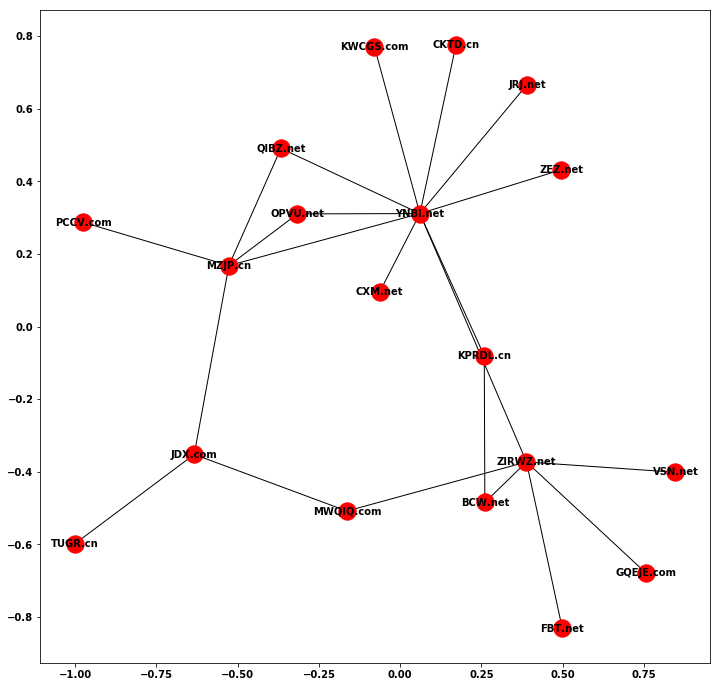

In [358]:
plt.figure(figsize=(12,12))
nx.draw_networkx(website_network, font_size=10)
plt.show()

#### Get PageRank of Websites by nx.pagerank

In [359]:
sorted(nx.pagerank(website_network).items(), key=lambda x: x[1], reverse=True)

[('YNBI.net', 0.2030701451530325),
 ('ZIRWZ.net', 0.14569241660315163),
 ('MZJP.cn', 0.11637822186508981),
 ('JDX.com', 0.06570018197658263),
 ('BCW.net', 0.044274666575235655),
 ('MWQIQ.com', 0.0442015647078277),
 ('KPRDL.cn', 0.04397159535039434),
 ('OPVU.net', 0.04164214334438264),
 ('QIBZ.net', 0.04164214334438264),
 ('TUGR.cn', 0.026510038288560193),
 ('FBT.net', 0.025586263261372776),
 ('VSN.net', 0.025586263261372776),
 ('GQEJE.com', 0.025586263261372776),
 ('CXM.net', 0.025155303205188453),
 ('ZEZ.net', 0.025155303205188453),
 ('KWCGS.com', 0.025155303205188453),
 ('JRJ.net', 0.025155303205188453),
 ('CKTD.cn', 0.025155303205188453),
 ('PCCV.com', 0.02438157698129945)]